# Анализ видеоданных

**Данные:**
* **Данные были собраны в ходе тестирования 5 человек по общим знаниям за курс основной школы, состоящем из 15 вопросов.** 
* 5 датасетов (data1-data5), каждый из которых содержит информацию о движениях лица, глаза, состоянии глаз, выражении лица и  положения головы за определенный временной промежуток. 
* Каждый датасет представлен в формате Pandas DataFrame.
* Каждое наблюдение в датасете содержит информацию о:
    * Timestamp (дата и время наблюдения)
    * Face ID (номер лица)
    * Eye State (состояние глаз - Open или Closed)
    * Expression (выражение лица - Neutral, Smiling)
    * Head Pose (Pitch, Yaw) - угол наклона головы по вертикальной и горизонтальной оси
    * Head Movement Frequency (частота движения головы)
    * Head Movement Amplitude (амплитуда движения головы)
    * Average Head Position (X, Y) - среднее положение головы на видео
    * Head Orientation Change (изменение ориентации головы)


**Программа использует библиотеку `dlib` для детекции лиц и получения ключевых точек на лице. Давайте подробно рассмотрим, как это происходит.**

### 1. Загрузка предиктора и детектора

В начале программы происходит загрузка предиктора ключевых точек и детектора лиц:

```python
try:
    predictor = dlib.shape_predictor(predictor_path)
    detector = dlib.get_frontal_face_detector()
except Exception as e:
    print(f"Ошибка загрузки dlib: {e}")
    exit()
```

- **`shape_predictor`**: Это объект, который загружает заранее обученную модель для определения ключевых точек на лице. В данном случае используется модель `shape_predictor_68_face_landmarks.dat`, которая определяет 68 ключевых точек на лице.
- **`get_frontal_face_detector`**: Это метод, который создает детектор лиц, способный обнаруживать лица на изображениях.

### 2. Чтение кадров из видеопотока

Программа захватывает кадры с камеры с помощью OpenCV:

```python
camera = cv2.VideoCapture(0)
if not camera.isOpened():
    print("Ошибка: Не удалось открыть камеру.")
    exit()
```

- `cv2.VideoCapture(0)` открывает видеопоток с первой доступной камеры (обычно это веб-камера).

### 3. Обработка каждого кадра

В основном цикле программы каждый кадр обрабатывается следующим образом:

```python
while True:
    ret, frame = camera.read()
    if not ret:
        print("Ошибка: Не удалось прочитать кадр.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
```

- Кадр считывается из видеопотока и преобразуется в оттенки серого (`gray`).

### 4. Детекция лиц

Детектор лиц применяется к серому изображению:

```python
faces = detector(gray, 0)
```

- `detector(gray, 0)` возвращает список прямоугольников, представляющих найденные лица на изображении.

### 5. Получение ключевых точек

Для каждого найденного лица программа получает ключевые точки следующим образом:

```python
for (i, face) in enumerate(faces):
    try:
        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)
```

- **`predictor(gray, face)`**: Этот метод принимает серое изображение и прямоугольник, представляющий лицо. Он возвращает объект, содержащий координаты 68 ключевых точек на лице.
- **`face_utils.shape_to_np(landmarks)`**: Этот метод преобразует ключевые точки в формат NumPy, что упрощает дальнейшую обработку.

### 6. Отрисовка ключевых точек

После получения ключевых точек программа может отрисовать их на изображении:

```python
for (x, y) in landmarks:
    cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)
```

- Здесь каждая ключевая точка рисуется как зеленая точка на изображении.

### В итоге, программа использует `dlib` для детекции лиц и получения ключевых точек следующим образом:

1. Загружает предиктор и детектор.
2. Читает кадры из видеопотока.
3. Применяет детектор лиц к каждому кадру.
4. Для каждого найденного лица получает ключевые точки с помощью предиктора.
5. Отрисовывает ключевые точки на изображении для визуализации.


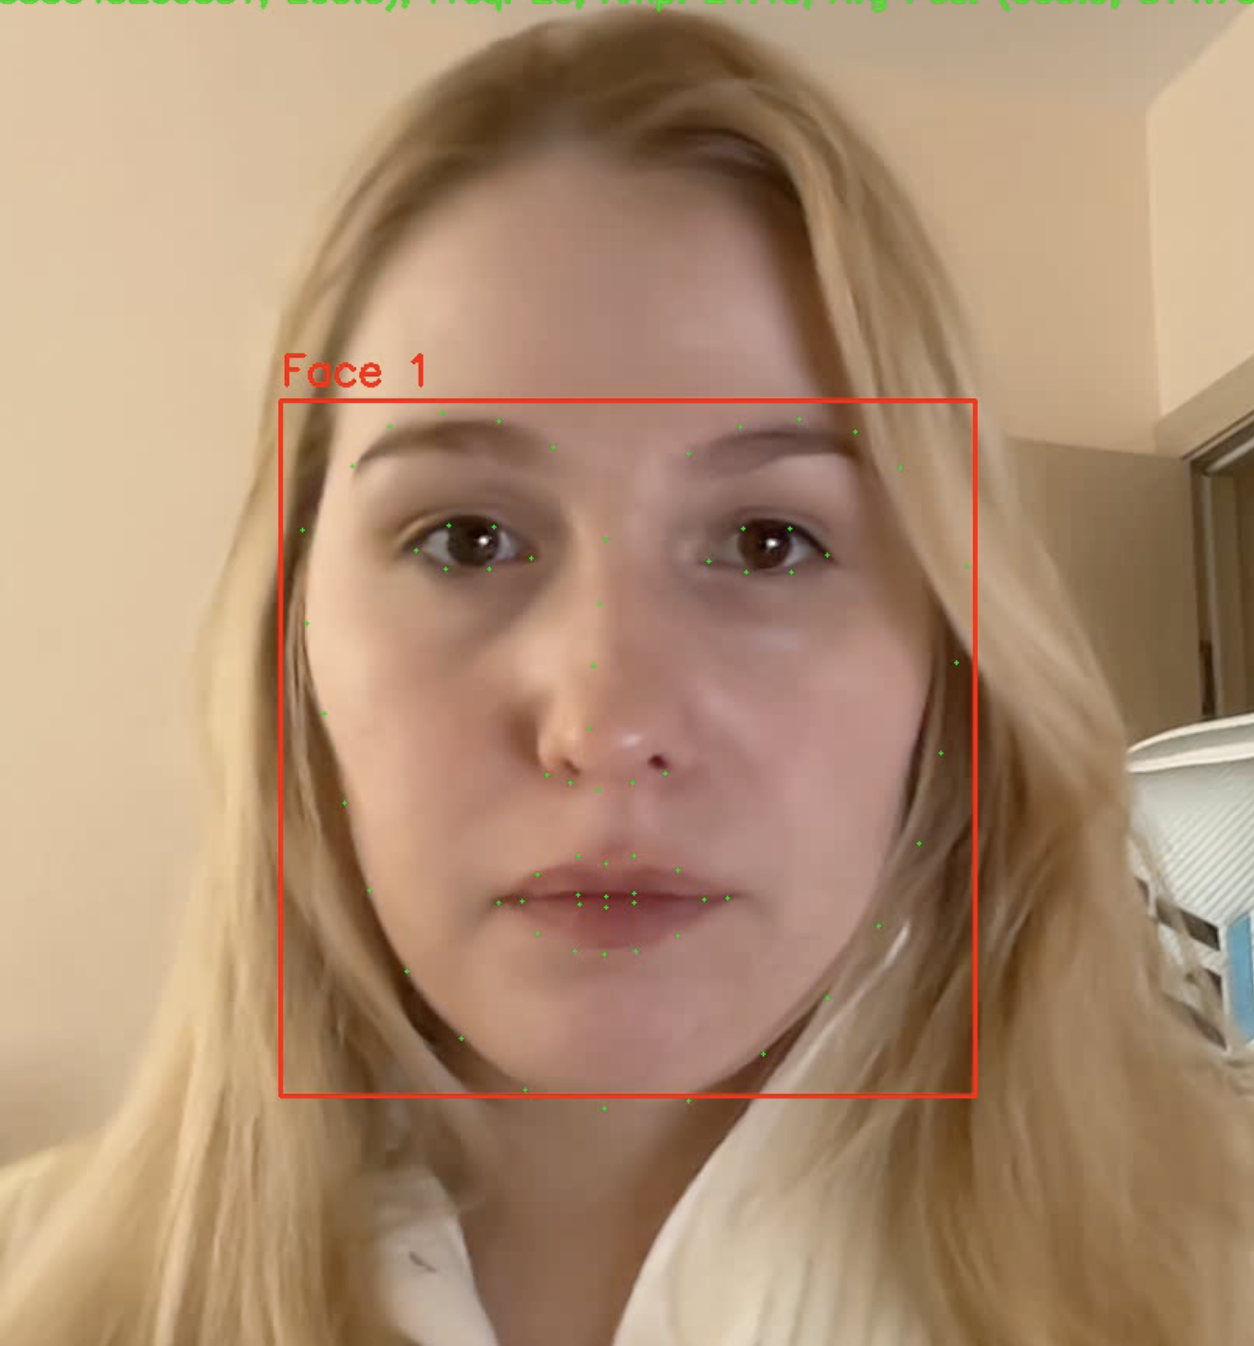

In [1]:
from IPython.display import Image
Image(filename="image.png", width=500)


Программа собирает несколько признаков, связанных с движениями лица и состоянием глаз. 

### Собираемые признаки:


* 1. **Состояние глаз (Eye State)**:
 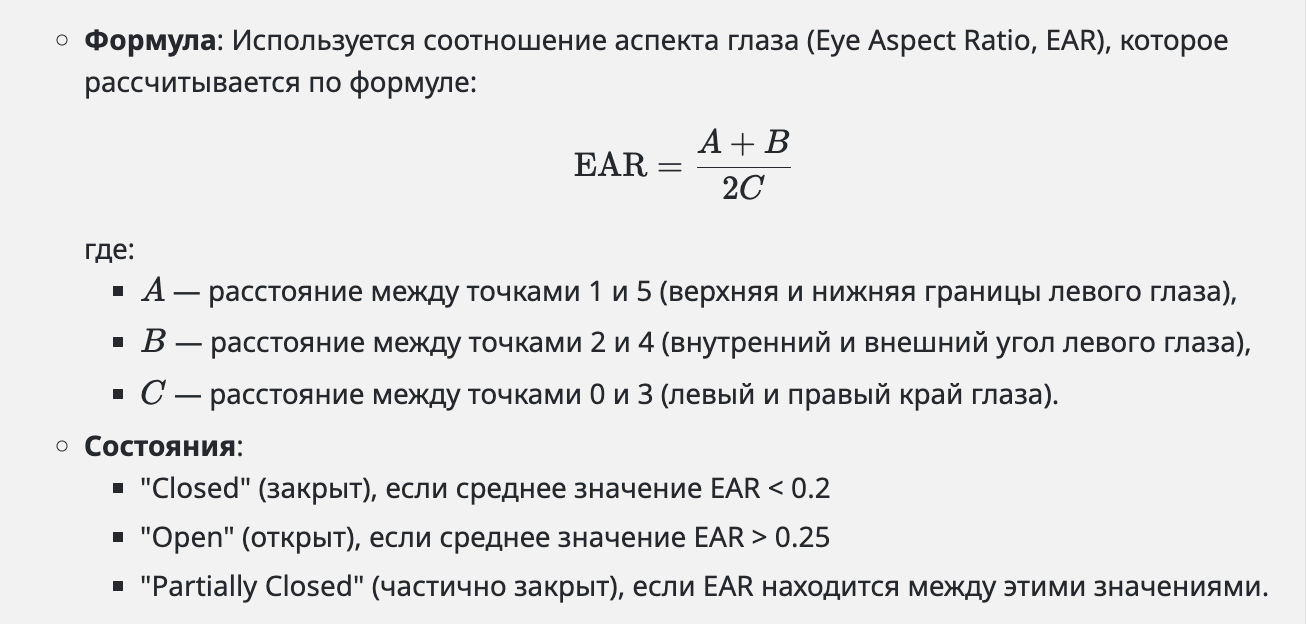 
* 2. **Выражение лица (Expression)**:
  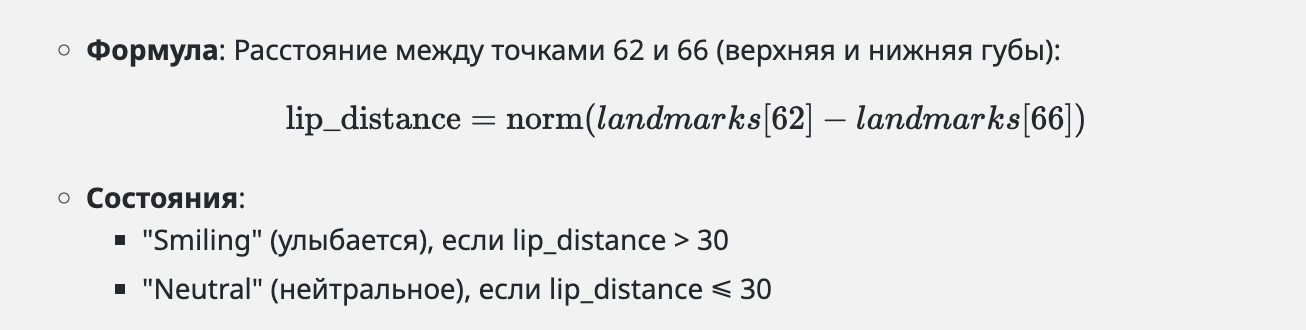

* 3. **Положение головы (Head Pose)**:
  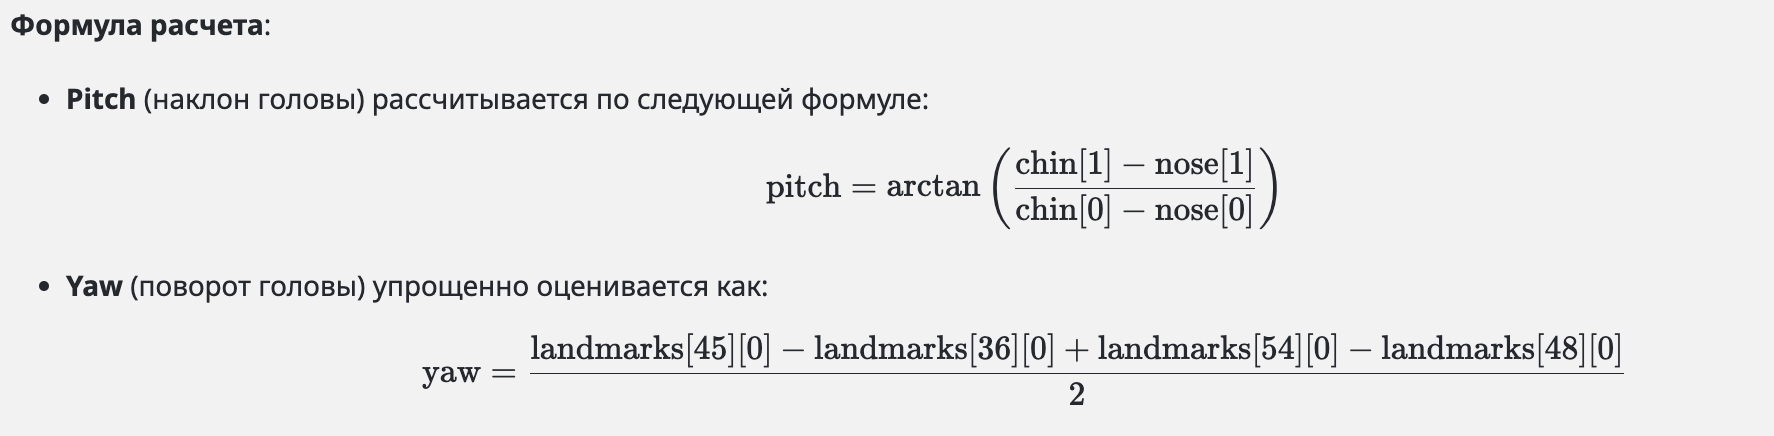
* 4. **Частота и амплитуда движения головы (Head Movement Frequency and Amplitude)**:
 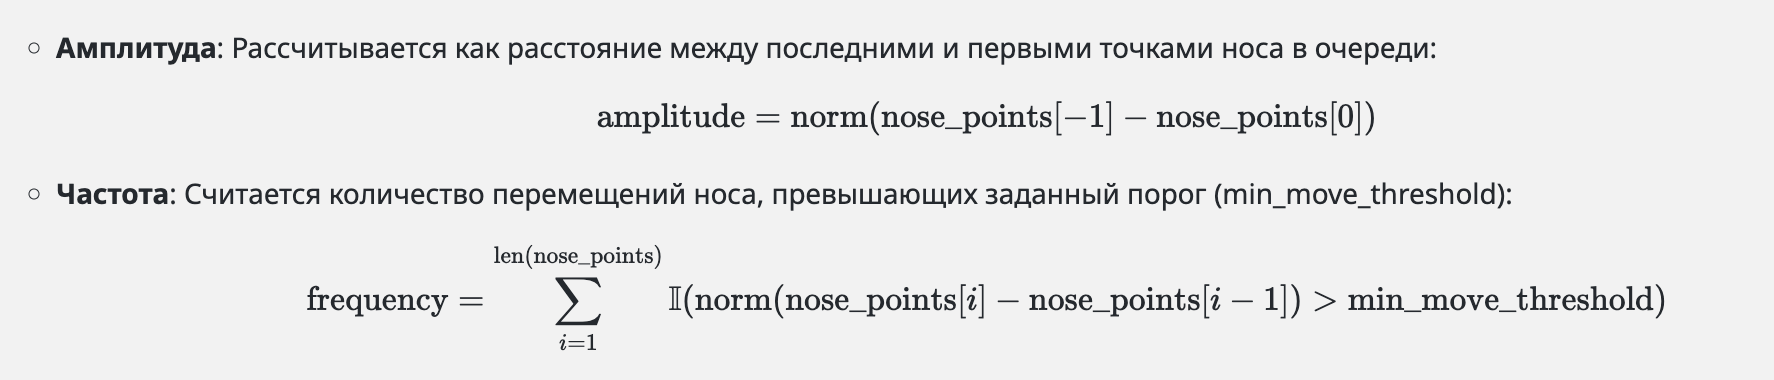
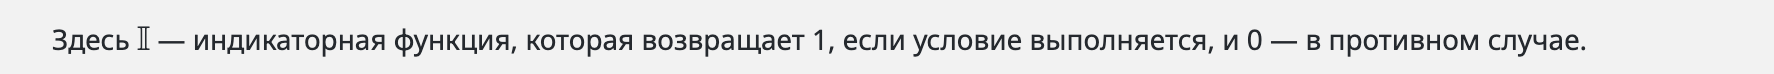
* 6. **Изменение ориентации головы (Head Orientation Change)**:
  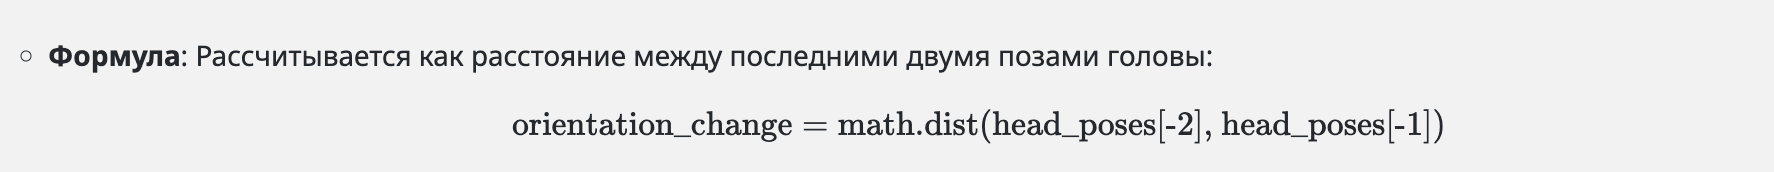
* 7. **Среднее положение головы (Average Head Position)**:
  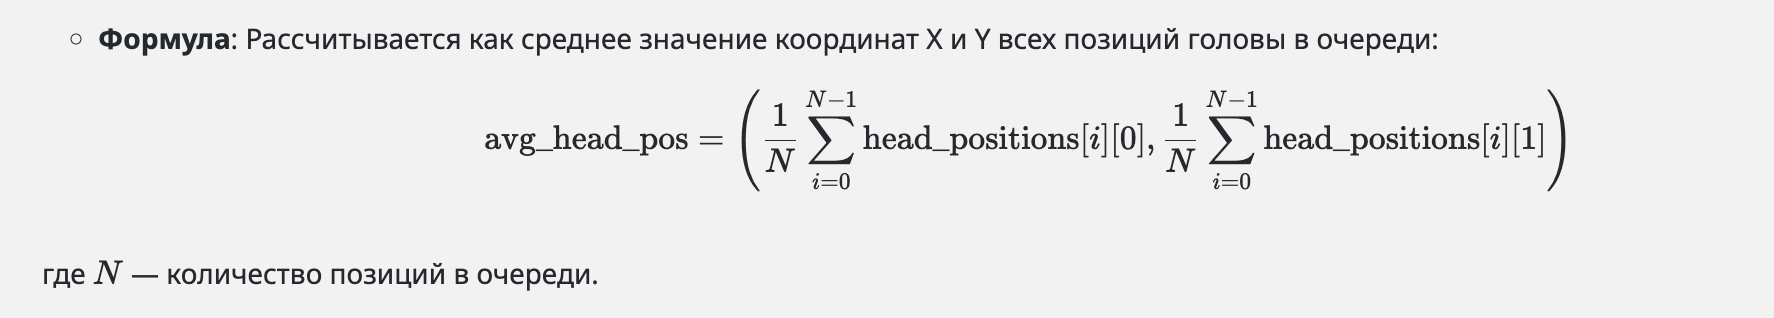


# Загрузка данных

In [2]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import norm
import seaborn as sns
import scipy.stats as st

In [3]:
def visualize_data2(data, dataset_name):
    plt.figure(figsize=(18, 12))
    
    # Определяем уникальные значения для состояния глаз и выражения лица
    eye_state_count = data['Eye State'].nunique()
    expression_count = data['Expression'].nunique()
    
    # Установка цветовой палитры
    max_colors = max(eye_state_count, expression_count)
    palette = sns.color_palette("muted", n_colors=max_colors)

    # Состояние глаз
    plt.subplot(3, 3, 1)
    sns.countplot(x='Eye State', data=data, hue='Eye State', palette=palette[:eye_state_count], legend=False)
    plt.title(f'{dataset_name} - Состояние глаз', fontsize=16)
    plt.xlabel('Состояние глаз', fontsize=14)
    plt.ylabel('Количество', fontsize=14)
    
    # Выражение лица
    plt.subplot(3, 3, 2)
    sns.countplot(x='Expression', data=data, hue='Expression', palette=palette[:expression_count], legend=False)
    plt.title(f'{dataset_name} - Выражение лица', fontsize=16)
    plt.xlabel('Выражение лица', fontsize=14)
    plt.ylabel('Количество', fontsize=14)
    
    # Положение головы (Pitch, Yaw)
    plt.subplot(3, 3, 3)
    sns.scatterplot(x='Head Pose (Yaw)', y='Head Pose (Pitch)', data=data, color=palette[0], alpha=0.6, edgecolor='w', s=100)
    plt.title(f'{dataset_name} - Положение головы', fontsize=16)
    plt.xlabel('Yaw (градусы)', fontsize=14)
    plt.ylabel('Pitch (градусы)', fontsize=14)
    plt.grid(True)
    
    # Частота движения головы
    plt.subplot(3, 3, 4)
    sns.histplot(data['Head Movement Frequency'], bins=30, kde=True, color=palette[1], alpha=0.7)
    plt.title(f'{dataset_name} - Частота движения головы', fontsize=16)
    plt.xlabel('Частота движения головы', fontsize=14)
    plt.ylabel('Плотность', fontsize=14)
    
    # Амплитуда движения головы
    plt.subplot(3, 3, 5)
    sns.histplot(data['Head Movement Amplitude'], bins=30, kde=True, color=palette[2], alpha=0.7)
    plt.title(f'{dataset_name} - Амплитуда движения головы', fontsize=16)
    plt.xlabel('Амплитуда движения головы', fontsize=14)
    plt.ylabel('Плотность', fontsize=14)
    
    # Изменение ориентации головы
    plt.subplot(3, 3, 6)
    sns.histplot(data['Head Orientation Change'], bins=30, kde=True, color=palette[3] if len(palette) > 3 else palette[0], alpha=0.7)
    plt.title(f'{dataset_name} - Изменение ориентации головы', fontsize=16)
    plt.xlabel('Изменение ориентации головы', fontsize=14)
    plt.ylabel('Плотность', fontsize=14)
    
    # Среднее положение головы (X, Y)
    plt.subplot(3, 3, 7)
    sns.scatterplot(x='Average Head Position (X)', y='Average Head Position (Y)', data=data, color=palette[4] if len(palette) > 4 else palette[0], alpha=0.6, edgecolor='w', s=100)
    plt.title(f'{dataset_name} - Среднее положение головы', fontsize=16)
    plt.xlabel('X (положение)', fontsize=14)
    plt.ylabel('Y (положение)', fontsize=14)
    plt.grid(True)

    # Изменение ориентации головы (гистограмма)
    plt.subplot(3, 3, 8)
    sns.histplot(data['Head Orientation Change'], bins=30, kde=True, color=palette[5] if len(palette) > 5 else palette[0], alpha=0.7)
    plt.title(f'{dataset_name} - Изменение ориентации головы', fontsize=16)
    plt.xlabel('Изменение ориентации головы', fontsize=14)
    plt.ylabel('Плотность', fontsize=14)

    # Общая настройка графиков
    plt.tight_layout()
    plt.show()


In [4]:
def visualize_features_over_time(data, dataset_name):
    plt.figure(figsize=(18, 12))

    # Временная ось
    plt.subplot(3, 3, 1)
    sns.lineplot(x='Timestamp', y='Head Movement Frequency', data=data, color='blue', label='Частота движения головы')
    plt.title(f'{dataset_name} - Частота движения головы по времени', fontsize=15)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Амплитуда движения головы по времени
    plt.subplot(3, 3, 2)
    sns.lineplot(x='Timestamp', y='Head Movement Amplitude', data=data, color='orange', label='Амплитуда движения головы')
    plt.title(f'{dataset_name} - Амплитуда движения головы по времени', fontsize=15)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Амплитуда', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Угол наклона головы (Pitch) по времени
    plt.subplot(3, 3, 3)
    sns.lineplot(x='Timestamp', y='Head Pose (Pitch)', data=data, color='green', label='Pitch')
    plt.title(f'{dataset_name} - Угол наклона головы (Pitch) по времени', fontsize=15)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Pitch (градусы)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Угол наклона головы (Yaw) по времени
    plt.subplot(3, 3, 4)
    sns.lineplot(x='Timestamp', y='Head Pose (Yaw)', data=data, color='purple', label='Yaw')
    plt.title(f'{dataset_name} - Угол наклона головы (Yaw) по времени', fontsize=15)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Yaw (градусы)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Изменение ориентации головы по времени
    plt.subplot(3, 3, 5)
    sns.lineplot(x='Timestamp', y='Head Orientation Change', data=data, color='red', label='Изменение ориентации головы')
    plt.title(f'{dataset_name} - Изменение ориентации головы по времени', fontsize=16)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Изменение ориентации', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Среднее положение головы (X) по времени
    plt.subplot(3, 3, 6)
    sns.lineplot(x='Timestamp', y='Average Head Position (X)', data=data, color='cyan', label='Положение головы (X)')
    plt.title(f'{dataset_name} - Среднее положение головы (X) по времени', fontsize=15)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Положение (X)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Среднее положение головы (Y) по времени
    plt.subplot(3, 3, 7)
    sns.lineplot(x='Timestamp', y='Average Head Position (Y)', data=data, color='magenta', label='Положение головы (Y)')
    plt.title(f'{dataset_name} - Среднее положение головы (Y) по времени', fontsize=15)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Положение (Y)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Общая настройка графиков
    plt.tight_layout()
    plt.show()


In [5]:
# Загрузка данных
data1 = pd.read_csv('/Users/veronikasoloveva/Downloads/дисс/data/face_1.csv')
data2 = pd.read_csv('/Users/veronikasoloveva/Downloads/дисс/data/face_2.csv')
data3 = pd.read_csv('/Users/veronikasoloveva/Downloads/дисс/data/face_3.csv')
data4 = pd.read_csv('/Users/veronikasoloveva/Downloads/дисс/data/face_4.csv')
data5 = pd.read_csv('/Users/veronikasoloveva/Downloads/дисс/data/face_5.csv')

In [6]:
data1.head()

Timestamp  Face ID Eye State Expression  \
0  2025-01-12 13:39:11        1      Open    Neutral   
1  2025-01-12 13:39:12        1      Open    Neutral   
2  2025-01-12 13:39:12        1      Open    Neutral   
3  2025-01-12 13:39:12        1      Open    Neutral   
4  2025-01-12 13:39:12        1      Open    Neutral   

        Head Pose (Pitch, Yaw)  Head Movement Frequency  \
0  (1.4296948169711912, 181.5)                        0   
1  (1.4241298329977037, 183.5)                        0   
2  (1.4304815493512804, 183.0)                        0   
3  (1.4650470416735573, 185.0)                        1   
4   (1.488564598975821, 182.0)                        2   

   Head Movement Amplitude Average Head Position (X, Y)  \
0                 0.000000              (1129.0, 588.0)   
1                 2.828427              (1129.5, 589.0)   
2                 2.236068  (1130.0, 589.6666666666666)   
3                23.086793              (1133.5, 589.5)   
4                37.107951              (1137.6, 588.4)   

   Head Orientation Change  
0                 0.000000  
1                 2.000008  
2                 2.000008  
3                 2.000008  
4                 2.000008

In [7]:
data2.head()

Timestamp  Face ID         Eye State Expression  \
0  2025-01-12 13:49:05        1              Open    Neutral   
1  2025-01-12 13:49:06        1  Partially Closed    Neutral   
2  2025-01-12 13:49:07        1              Open    Neutral   
3  2025-01-12 13:49:07        1              Open    Neutral   
4  2025-01-12 13:49:07        1              Open    Neutral   

        Head Pose (Pitch, Yaw)  Head Movement Frequency  \
0  (1.3449049195082676, 168.5)                        0   
1  (1.3101939350475555, 175.0)                        1   
2   (1.328587739685276, 172.5)                        1   
3  (1.3244421487171116, 174.5)                        1   
4  (1.3473197256542635, 174.0)                        1   

   Head Movement Amplitude Average Head Position (X, Y)  \
0                 0.000000              (1054.0, 552.0)   
1                47.381431              (1037.5, 568.5)   
2                50.209561              (1032.0, 575.0)   
3                50.911688            (1029.25, 578.25)   
4                49.517674              (1027.6, 580.2)   

   Head Orientation Change  
0                 0.000000  
1                 6.500093  
2                 6.500093  
3                 6.500093  
4                 6.500093

In [8]:
data3.head()

Timestamp  Face ID Eye State Expression  \
0  2025-01-12 16:08:18        1      Open    Neutral   
1  2025-01-12 16:08:20        1      Open    Neutral   
2  2025-01-12 16:08:20        1      Open    Neutral   
3  2025-01-12 16:08:20        1      Open    Neutral   
4  2025-01-12 16:08:21        1      Open    Neutral   

        Head Pose (Pitch, Yaw)  Head Movement Frequency  \
0   (1.659126767293952, 192.0)                        0   
1  (1.6771550203214025, 194.5)                        0   
2  (1.6899207461234995, 204.0)                        0   
3   (1.686814321358029, 205.0)                        0   
4  (1.6899207461234995, 202.0)                        0   

   Head Movement Amplitude Average Head Position (X, Y)  \
0                 0.000000               (979.0, 495.0)   
1                 2.828427               (978.0, 495.5)   
2                 3.605551   (979.0, 494.6666666666667)   
3                 5.000000              (979.75, 494.5)   
4                10.770330               (981.0, 493.8)   

   Head Orientation Change  
0                 0.000000  
1                 2.500065  
2                 2.500065  
3                 2.500065  
4                 2.500065

In [9]:
data4.head()

Timestamp  Face ID         Eye State Expression  \
0  2025-01-12 22:18:56        1              Open    Neutral   
1  2025-01-12 22:18:58        1  Partially Closed    Neutral   
2  2025-01-12 22:18:59        1              Open    Neutral   
3  2025-01-12 22:18:59        1              Open    Neutral   
4  2025-01-12 22:18:59        1              Open    Neutral   

        Head Pose (Pitch, Yaw)  Head Movement Frequency  \
0  (1.6445752107066085, 198.5)                        0   
1  (1.6674108875601097, 196.5)                        0   
2  (1.6674108875601097, 199.0)                        0   
3   (1.654302123012794, 202.5)                        0   
4  (1.6669897543537657, 201.0)                        0   

   Head Movement Amplitude             Average Head Position (X, Y)  \
0                 0.000000                          (1115.0, 461.0)   
1                 5.385165                          (1116.0, 462.5)   
2                 5.000000  (1116.3333333333333, 462.6666666666667)   
3                 5.000000                         (1116.5, 462.75)   
4                 5.099020                          (1116.4, 462.8)   

   Head Orientation Change  
0                  0.00000  
1                  2.00013  
2                  2.00013  
3                  2.00013  
4                  2.00013

In [10]:
data5.head()

Timestamp  Face ID Eye State Expression  \
0  2025-01-13 11:36:29        1      Open    Neutral   
1  2025-01-13 11:36:30        1      Open    Neutral   
2  2025-01-13 11:36:30        1      Open    Neutral   
3  2025-01-13 11:36:30        1      Open    Neutral   
4  2025-01-13 11:36:31        1      Open    Neutral   

        Head Pose (Pitch, Yaw)  Head Movement Frequency  \
0   (1.527516283955949, 191.5)                        0   
1  (1.6199990075652946, 196.0)                        1   
2   (1.589591105917445, 201.0)                        1   
3  (1.5707963267948966, 205.0)                        1   
4  (1.5782588748301456, 201.0)                        1   

   Head Movement Amplitude Average Head Position (X, Y)  \
0                 0.000000               (926.0, 643.0)   
1                50.358713               (942.0, 642.0)   
2                43.737855   (948.6666666666666, 643.0)   
3                39.293765               (952.0, 644.0)   
4                39.293765               (953.4, 644.2)   

   Head Orientation Change  
0                  0.00000  
1                  4.50095  
2                  4.50095  
3                  4.50095  
4                  4.50095

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     1599 non-null   object 
 1   Face ID                       1599 non-null   int64  
 2   Eye State                     1599 non-null   object 
 3   Expression                    1599 non-null   object 
 4   Head Pose (Pitch, Yaw)        1599 non-null   object 
 5   Head Movement Frequency       1599 non-null   int64  
 6   Head Movement Amplitude       1599 non-null   float64
 7   Average Head Position (X, Y)  1599 non-null   object 
 8   Head Orientation Change       1599 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 112.6+ KB


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     1236 non-null   object 
 1   Face ID                       1236 non-null   int64  
 2   Eye State                     1236 non-null   object 
 3   Expression                    1236 non-null   object 
 4   Head Pose (Pitch, Yaw)        1236 non-null   object 
 5   Head Movement Frequency       1236 non-null   int64  
 6   Head Movement Amplitude       1236 non-null   float64
 7   Average Head Position (X, Y)  1236 non-null   object 
 8   Head Orientation Change       1236 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 87.0+ KB


In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     1886 non-null   object 
 1   Face ID                       1886 non-null   int64  
 2   Eye State                     1886 non-null   object 
 3   Expression                    1886 non-null   object 
 4   Head Pose (Pitch, Yaw)        1886 non-null   object 
 5   Head Movement Frequency       1886 non-null   int64  
 6   Head Movement Amplitude       1886 non-null   float64
 7   Average Head Position (X, Y)  1886 non-null   object 
 8   Head Orientation Change       1886 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 132.7+ KB


In [14]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     1529 non-null   object 
 1   Face ID                       1529 non-null   int64  
 2   Eye State                     1529 non-null   object 
 3   Expression                    1529 non-null   object 
 4   Head Pose (Pitch, Yaw)        1529 non-null   object 
 5   Head Movement Frequency       1529 non-null   int64  
 6   Head Movement Amplitude       1529 non-null   float64
 7   Average Head Position (X, Y)  1529 non-null   object 
 8   Head Orientation Change       1529 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 107.6+ KB


In [15]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     1499 non-null   object 
 1   Face ID                       1499 non-null   int64  
 2   Eye State                     1499 non-null   object 
 3   Expression                    1499 non-null   object 
 4   Head Pose (Pitch, Yaw)        1499 non-null   object 
 5   Head Movement Frequency       1499 non-null   int64  
 6   Head Movement Amplitude       1499 non-null   float64
 7   Average Head Position (X, Y)  1499 non-null   object 
 8   Head Orientation Change       1499 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 105.5+ KB


# Исследовательский анализ данных

In [16]:
# Удаление столбца 'Face ID' из всех датасетов
data1 = data1.drop(columns=['Face ID'])
data2 = data2.drop(columns=['Face ID'])
data3 = data3.drop(columns=['Face ID'])
data4 = data4.drop(columns=['Face ID'])
data5 = data5.drop(columns=['Face ID'])

In [17]:
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])
data3['Timestamp'] = pd.to_datetime(data3['Timestamp'])
data4['Timestamp'] = pd.to_datetime(data4['Timestamp'])
data5['Timestamp'] = pd.to_datetime(data5['Timestamp'])

In [18]:
# Вычисление длительности для каждого датасета
duration_data1 = (data1['Timestamp'].max() - data1['Timestamp'].min()).total_seconds()
duration_data2 = (data2['Timestamp'].max() - data2['Timestamp'].min()).total_seconds()
duration_data3 = (data3['Timestamp'].max() - data3['Timestamp'].min()).total_seconds()
duration_data4 = (data4['Timestamp'].max() - data4['Timestamp'].min()).total_seconds()
duration_data5 = (data5['Timestamp'].max() - data5['Timestamp'].min()).total_seconds()

# Преобразование длительности в минуты и секунды
def format_duration(seconds):
    minutes = int(seconds // 60)
    remaining_seconds = int(seconds % 60)
    return f"{minutes} минут(ы) {remaining_seconds} секунд(ы)"

# Вывод результатов
print(f"Длительность data1: {format_duration(duration_data1)}")
print(f"Длительность data2: {format_duration(duration_data2)}")
print(f"Длительность data3: {format_duration(duration_data3)}")
print(f"Длительность data4: {format_duration(duration_data4)}")
print(f"Длительность data5: {format_duration(duration_data5)}")



Длительность data1: 5 минут(ы) 47 секунд(ы)
Длительность data2: 4 минут(ы) 26 секунд(ы)
Длительность data3: 6 минут(ы) 53 секунд(ы)
Длительность data4: 7 минут(ы) 21 секунд(ы)
Длительность data5: 5 минут(ы) 9 секунд(ы)


In [19]:
# Функция для преобразования строковых представлений в кортежи и извлечения значений
def convert_tuple_string_to_numeric(tuple_str):
    try:
        return pd.Series(eval(tuple_str))  # Преобразование строки в кортеж
    except Exception as e:
        print(f"Ошибка преобразования: {e}")
        return pd.Series([None, None])  # Возвращаем None в случае ошибки

# Функция для преобразования DataFrame
def preprocess_data(data):
    # Преобразование временной метки в datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    # Преобразование столбцов в числовой формат
    data['Head Movement Frequency'] = pd.to_numeric(data['Head Movement Frequency'], errors='coerce')
    data['Head Movement Amplitude'] = pd.to_numeric(data['Head Movement Amplitude'], errors='coerce')
    data['Head Orientation Change'] = pd.to_numeric(data['Head Orientation Change'], errors='coerce')

    # Преобразование кортежей
    head_pose_df = data['Head Pose (Pitch, Yaw)'].apply(convert_tuple_string_to_numeric)
    data[['Head Pose (Pitch)', 'Head Pose (Yaw)']] = head_pose_df

    avg_head_position_df = data['Average Head Position (X, Y)'].apply(convert_tuple_string_to_numeric)
    data[['Average Head Position (X)', 'Average Head Position (Y)']] = avg_head_position_df

    # Удаление оригинальных строковых столбцов
    data.drop(columns=['Head Pose (Pitch, Yaw)', 'Average Head Position (X, Y)'], inplace=True)

    return data

# Применение предобработки к каждому датасету
data1 = preprocess_data(data1)
data2 = preprocess_data(data2)
data3 = preprocess_data(data3)
data4 = preprocess_data(data4)
data5 = preprocess_data(data5)

# Проверка преобразованных данных
print(data1.info())
print(data2.info())
print(data3.info())
print(data4.info())
print(data5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1599 non-null   datetime64[ns]
 1   Eye State                  1599 non-null   object        
 2   Expression                 1599 non-null   object        
 3   Head Movement Frequency    1599 non-null   int64         
 4   Head Movement Amplitude    1599 non-null   float64       
 5   Head Orientation Change    1599 non-null   float64       
 6   Head Pose (Pitch)          1599 non-null   float64       
 7   Head Pose (Yaw)            1599 non-null   float64       
 8   Average Head Position (X)  1599 non-null   float64       
 9   Average Head Position (Y)  1599 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 125.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [20]:
data1.describe(include='all')

Timestamp Eye State Expression  \
count                            1599      1599       1599   
unique                            NaN         3          2   
top                               NaN      Open    Neutral   
freq                              NaN      1520       1422   
mean    2025-01-12 13:42:05.135084288       NaN        NaN   
min               2025-01-12 13:39:11       NaN        NaN   
25%               2025-01-12 13:40:38       NaN        NaN   
50%               2025-01-12 13:42:06       NaN        NaN   
75%               2025-01-12 13:43:32       NaN        NaN   
max               2025-01-12 13:44:58       NaN        NaN   
std                               NaN       NaN        NaN   

        Head Movement Frequency  Head Movement Amplitude  \
count               1599.000000              1599.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                   7.194497                80.417023   
min                    0.000000                 0.000000   
25%                    0.000000                11.401754   
50%                    3.000000                26.627054   
75%                   13.000000               104.020227   
max                   28.000000               491.467191   
std                    8.417698               108.659729   

        Head Orientation Change  Head Pose (Pitch)  Head Pose (Yaw)  \
count               1599.000000        1599.000000      1599.000000   
unique                      NaN                NaN              NaN   
top                         NaN                NaN              NaN   
freq                        NaN                NaN              NaN   
mean                   3.576510           1.527026       228.657911   
min                    0.000000           1.021236        31.000000   
25%                    0.500544           1.472637       224.000000   
50%                    1.500151           1.547545       232.500000   
75%                    3.500024           1.606957       251.000000   
max                  126.500000           1.863602       283.000000   
std                    7.544816           0.130299        36.677376   

        Average Head Position (X)  Average Head Position (Y)  
count                 1599.000000                1599.000000  
unique                        NaN                        NaN  
top                           NaN                        NaN  
freq                          NaN                        NaN  
mean                  1070.678144                 785.809017  
min                    697.366667                 546.900000  
25%                   1008.700000                 671.583333  
50%                   1125.066667                 828.600000  
75%                   1146.200000                 865.366667  
max                   1175.800000                 909.733333  
std                    104.854015                 106.633693

In [21]:
data2.describe(include='all')

Timestamp Eye State Expression  \
count                            1236      1236       1236   
unique                            NaN         3          2   
top                               NaN      Open    Neutral   
freq                              NaN      1084       1230   
mean    2025-01-12 13:51:18.177993216       NaN        NaN   
min               2025-01-12 13:49:05       NaN        NaN   
25%               2025-01-12 13:50:12       NaN        NaN   
50%               2025-01-12 13:51:18       NaN        NaN   
75%               2025-01-12 13:52:24       NaN        NaN   
max               2025-01-12 13:53:31       NaN        NaN   
std                               NaN       NaN        NaN   

        Head Movement Frequency  Head Movement Amplitude  \
count               1236.000000              1236.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                   4.220874                49.373978   
min                    0.000000                 0.000000   
25%                    0.000000                13.444320   
50%                    2.000000                29.000000   
75%                    7.000000                63.853225   
max                   21.000000               448.201963   
std                    5.012592                61.860238   

        Head Orientation Change  Head Pose (Pitch)  Head Pose (Yaw)  \
count               1236.000000        1236.000000      1236.000000   
unique                      NaN                NaN              NaN   
top                         NaN                NaN              NaN   
freq                        NaN                NaN              NaN   
mean                   2.262280           1.382519       176.807443   
min                    0.000000           0.993940        25.500000   
25%                    0.500146           1.335190       177.000000   
50%                    1.000200           1.373401       179.000000   
75%                    2.500000           1.430899       181.500000   
max                  142.500036           1.849760       202.000000   
std                    6.295112           0.090964        12.448588   

        Average Head Position (X)  Average Head Position (Y)  
count                 1236.000000                1236.000000  
unique                        NaN                        NaN  
top                           NaN                        NaN  
freq                          NaN                        NaN  
mean                  1028.363298                 606.875726  
min                    846.200000                 543.400000  
25%                   1018.733333                 598.950000  
50%                   1031.950000                 611.750000  
75%                   1039.741667                 619.533333  
max                   1087.400000                 651.133333  
std                     30.231017                  20.411258

In [22]:
data3.describe(include='all')

Timestamp Eye State Expression  \
count                            1886      1886       1886   
unique                            NaN         3          2   
top                               NaN      Open    Neutral   
freq                              NaN      1854       1885   
mean    2025-01-12 16:11:45.205726208       NaN        NaN   
min               2025-01-12 16:08:18       NaN        NaN   
25%     2025-01-12 16:10:01.249999872       NaN        NaN   
50%               2025-01-12 16:11:47       NaN        NaN   
75%               2025-01-12 16:13:28       NaN        NaN   
max               2025-01-12 16:15:11       NaN        NaN   
std                               NaN       NaN        NaN   

        Head Movement Frequency  Head Movement Amplitude  \
count               1886.000000              1886.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                   2.676034                31.088532   
min                    0.000000                 0.000000   
25%                    0.000000                 7.071068   
50%                    1.000000                15.132746   
75%                    4.000000                28.173568   
max                   23.000000               484.883491   
std                    3.656835                56.958457   

        Head Orientation Change  Head Pose (Pitch)  Head Pose (Yaw)  \
count               1886.000000        1886.000000      1886.000000   
unique                      NaN                NaN              NaN   
top                         NaN                NaN              NaN   
freq                        NaN                NaN              NaN   
mean                   3.047837           1.782990       188.777572   
min                    0.000000           1.192892        29.000000   
25%                    1.000012           1.757534       184.500000   
50%                    2.000042           1.789865       188.750000   
75%                    3.500025           1.817511       193.500000   
max                  132.500338           1.991545       270.000000   
std                    7.123170           0.060637         9.003137   

        Average Head Position (X)  Average Head Position (Y)  
count                 1886.000000                1886.000000  
unique                        NaN                        NaN  
top                           NaN                        NaN  
freq                          NaN                        NaN  
mean                  1047.059137                 493.654096  
min                    893.466667                 365.466667  
25%                   1039.766667                 489.108333  
50%                   1048.966667                 498.400000  
75%                   1058.425000                 505.400000  
max                   1214.533333                 523.966667  
std                     34.382314                  23.269477

In [23]:
data4.describe(include='all')

Timestamp Eye State Expression  \
count                            1529      1529       1529   
unique                            NaN         3          2   
top                               NaN      Open    Neutral   
freq                              NaN       859       1191   
mean    2025-01-12 22:22:03.813603584       NaN        NaN   
min               2025-01-12 22:18:56       NaN        NaN   
25%               2025-01-12 22:20:22       NaN        NaN   
50%               2025-01-12 22:21:43       NaN        NaN   
75%               2025-01-12 22:23:05       NaN        NaN   
max               2025-01-12 22:26:17       NaN        NaN   
std                               NaN       NaN        NaN   

        Head Movement Frequency  Head Movement Amplitude  \
count               1529.000000              1529.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                   6.415304                63.997158   
min                    0.000000                 0.000000   
25%                    0.000000                19.104973   
50%                    4.000000                44.283180   
75%                   11.000000                86.023253   
max                   25.000000               342.414953   
std                    6.689020                61.698936   

        Head Orientation Change  Head Pose (Pitch)  Head Pose (Yaw)  \
count               1529.000000        1529.000000      1529.000000   
unique                      NaN                NaN              NaN   
top                         NaN                NaN              NaN   
freq                        NaN                NaN              NaN   
mean                   3.283006           1.690551       200.778286   
min                    0.000000           1.276862       107.500000   
25%                    1.000014           1.670465       200.000000   
50%                    2.000031           1.704325       206.500000   
75%                    4.000025           1.730984       217.000000   
max                   59.000351           1.906198       249.500000   
std                    4.012895           0.074865        27.318779   

        Average Head Position (X)  Average Head Position (Y)  
count                 1529.000000                1529.000000  
unique                        NaN                        NaN  
top                           NaN                        NaN  
freq                          NaN                        NaN  
mean                  1103.328367                 515.756128  
min                   1004.333333                 443.600000  
25%                   1080.766667                 493.900000  
50%                   1113.000000                 517.300000  
75%                   1127.866667                 531.433333  
max                   1156.200000                 611.500000  
std                     33.766432                  33.141089

In [24]:
data5.describe(include='all')

Timestamp Eye State Expression  \
count                            1499      1499       1499   
unique                            NaN         3          2   
top                               NaN      Open    Neutral   
freq                              NaN      1458       1455   
mean    2025-01-13 11:39:04.016010496       NaN        NaN   
min               2025-01-13 11:36:29       NaN        NaN   
25%               2025-01-13 11:37:48       NaN        NaN   
50%               2025-01-13 11:39:04       NaN        NaN   
75%               2025-01-13 11:40:20       NaN        NaN   
max               2025-01-13 11:41:38       NaN        NaN   
std                               NaN       NaN        NaN   

        Head Movement Frequency  Head Movement Amplitude  \
count               1499.000000              1499.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                   1.799867                14.304006   
min                    0.000000                 0.000000   
25%                    0.000000                 3.000000   
50%                    0.000000                 4.472136   
75%                    0.000000                 7.810250   
max                   25.000000               309.782182   
std                    5.171166                33.330793   

        Head Orientation Change  Head Pose (Pitch)  Head Pose (Yaw)  \
count               1499.000000        1499.000000      1499.000000   
unique                      NaN                NaN              NaN   
top                         NaN                NaN              NaN   
freq                        NaN                NaN              NaN   
mean                   1.720463           1.529536       190.983322   
min                    0.000000           1.216893       159.000000   
25%                    0.500133           1.517002       188.000000   
50%                    1.000231           1.525883       190.000000   
75%                    2.000138           1.537227       193.500000   
max                   29.000013           1.861111       231.000000   
std                    1.953621           0.036040         5.884944   

        Average Head Position (X)  Average Head Position (Y)  
count                 1499.000000                1499.000000  
unique                        NaN                        NaN  
top                           NaN                        NaN  
freq                          NaN                        NaN  
mean                   951.104175                 486.817828  
min                    926.000000                 464.200000  
25%                    947.550000                 477.216667  
50%                    949.833333                 482.900000  
75%                    953.533333                 487.233333  
max                   1005.033333                 644.833333  
std                      8.565641                  24.632946

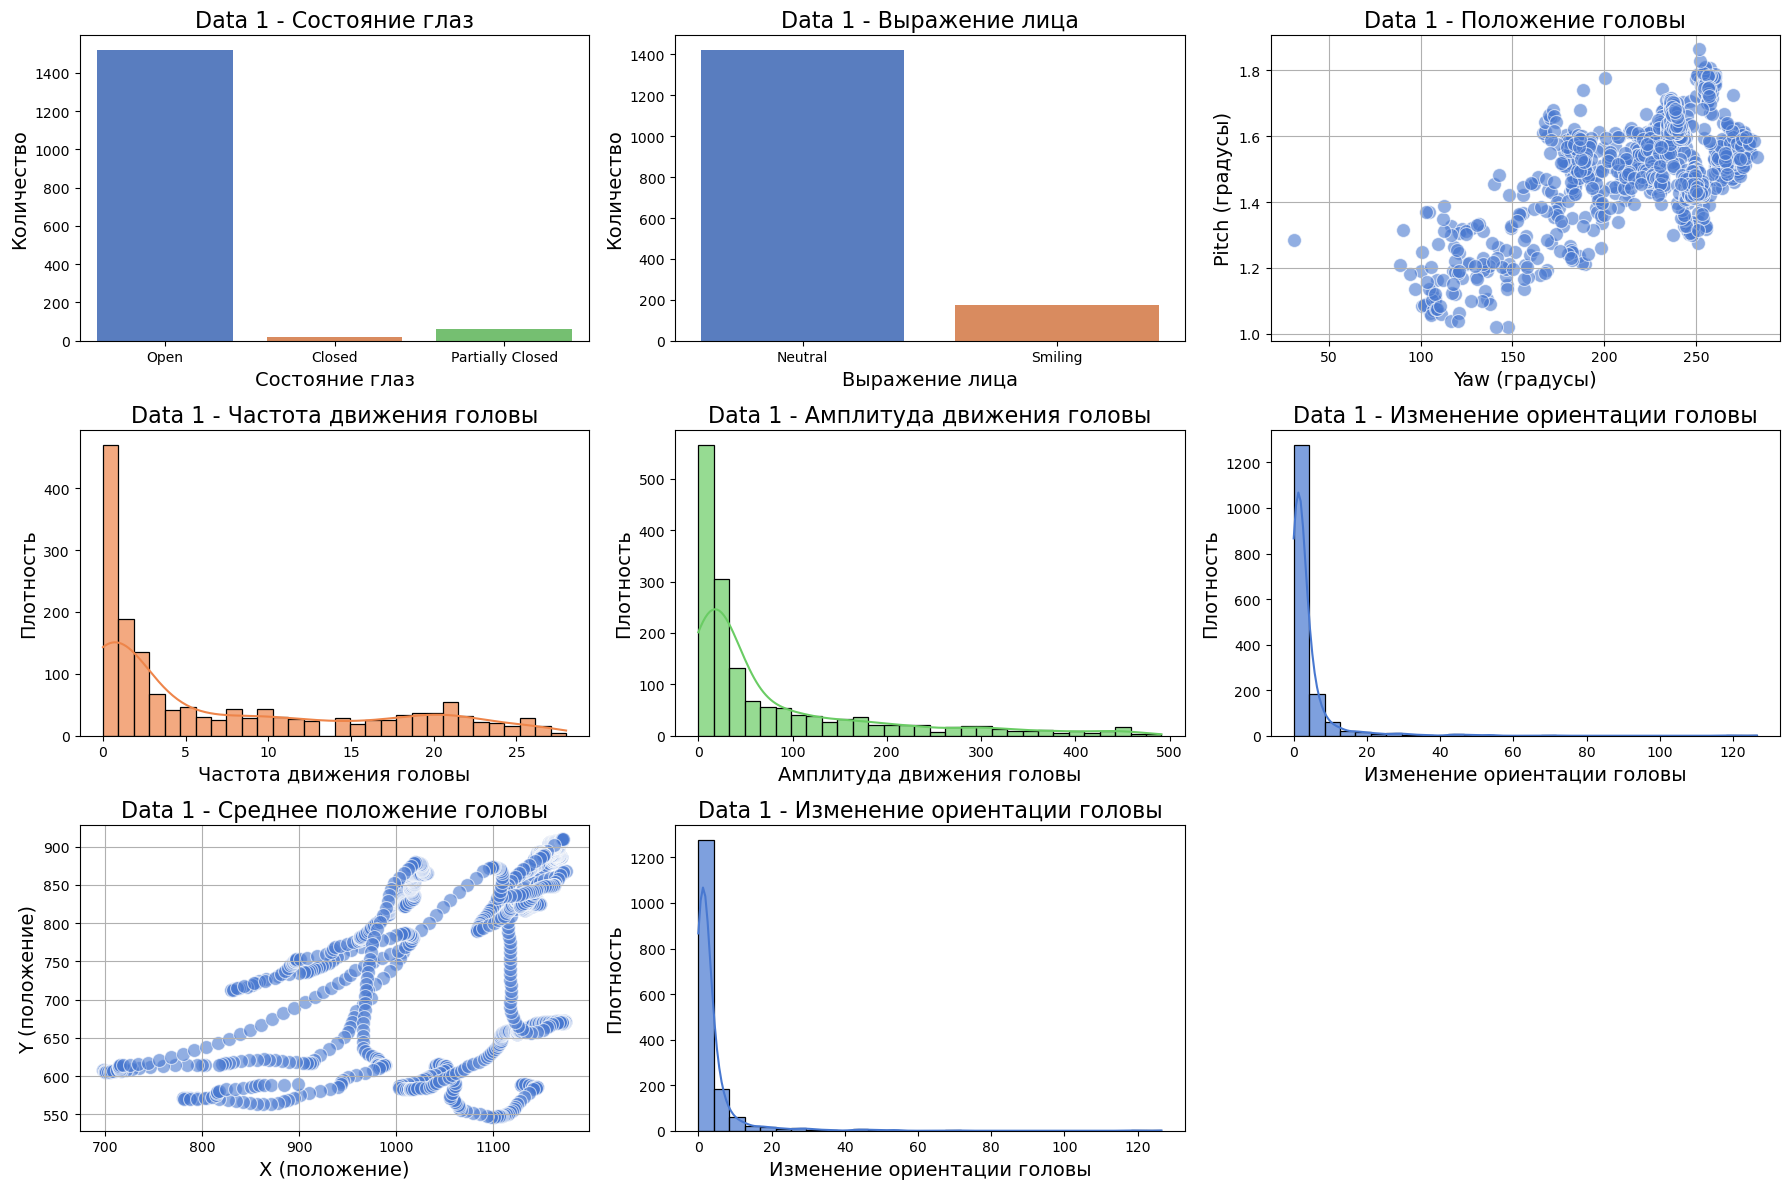

In [25]:
visualize_data2(data1, 'Data 1')


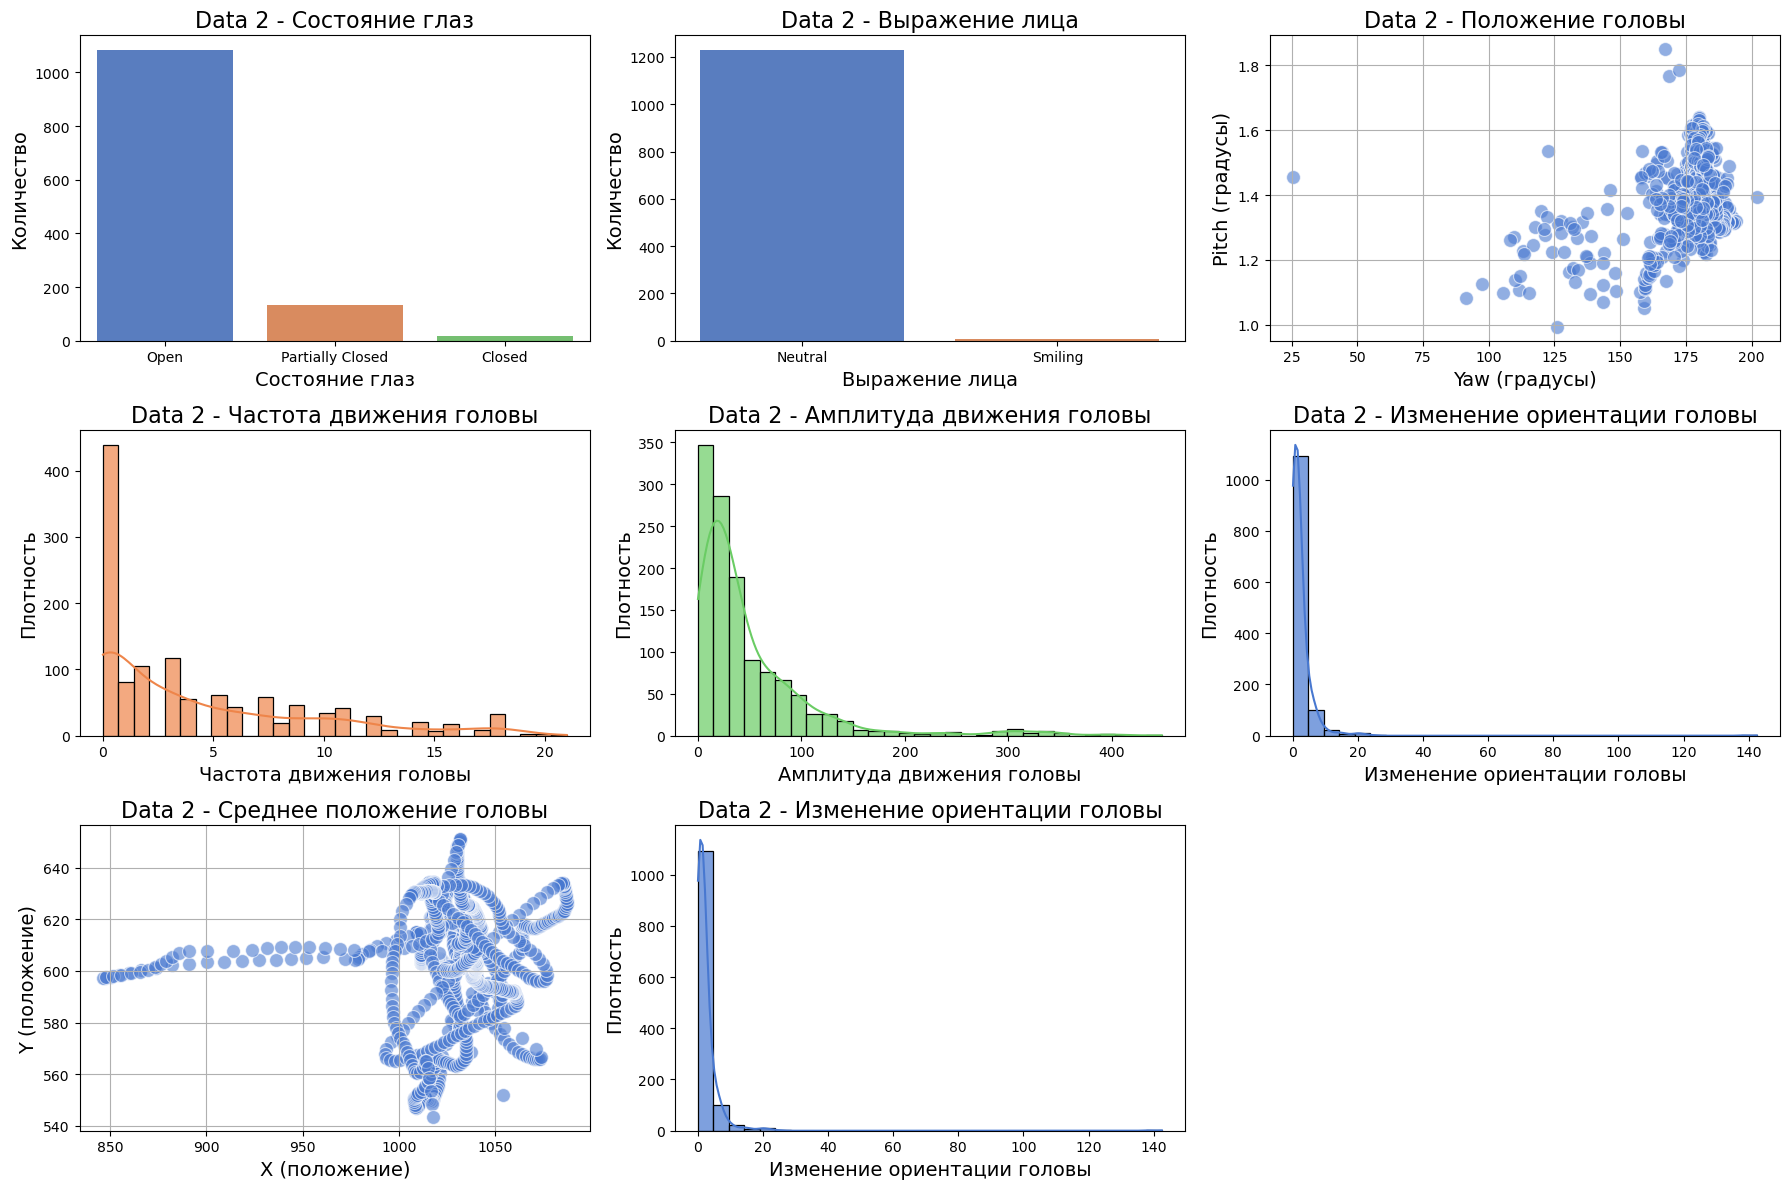

In [26]:
visualize_data2(data2, 'Data 2')


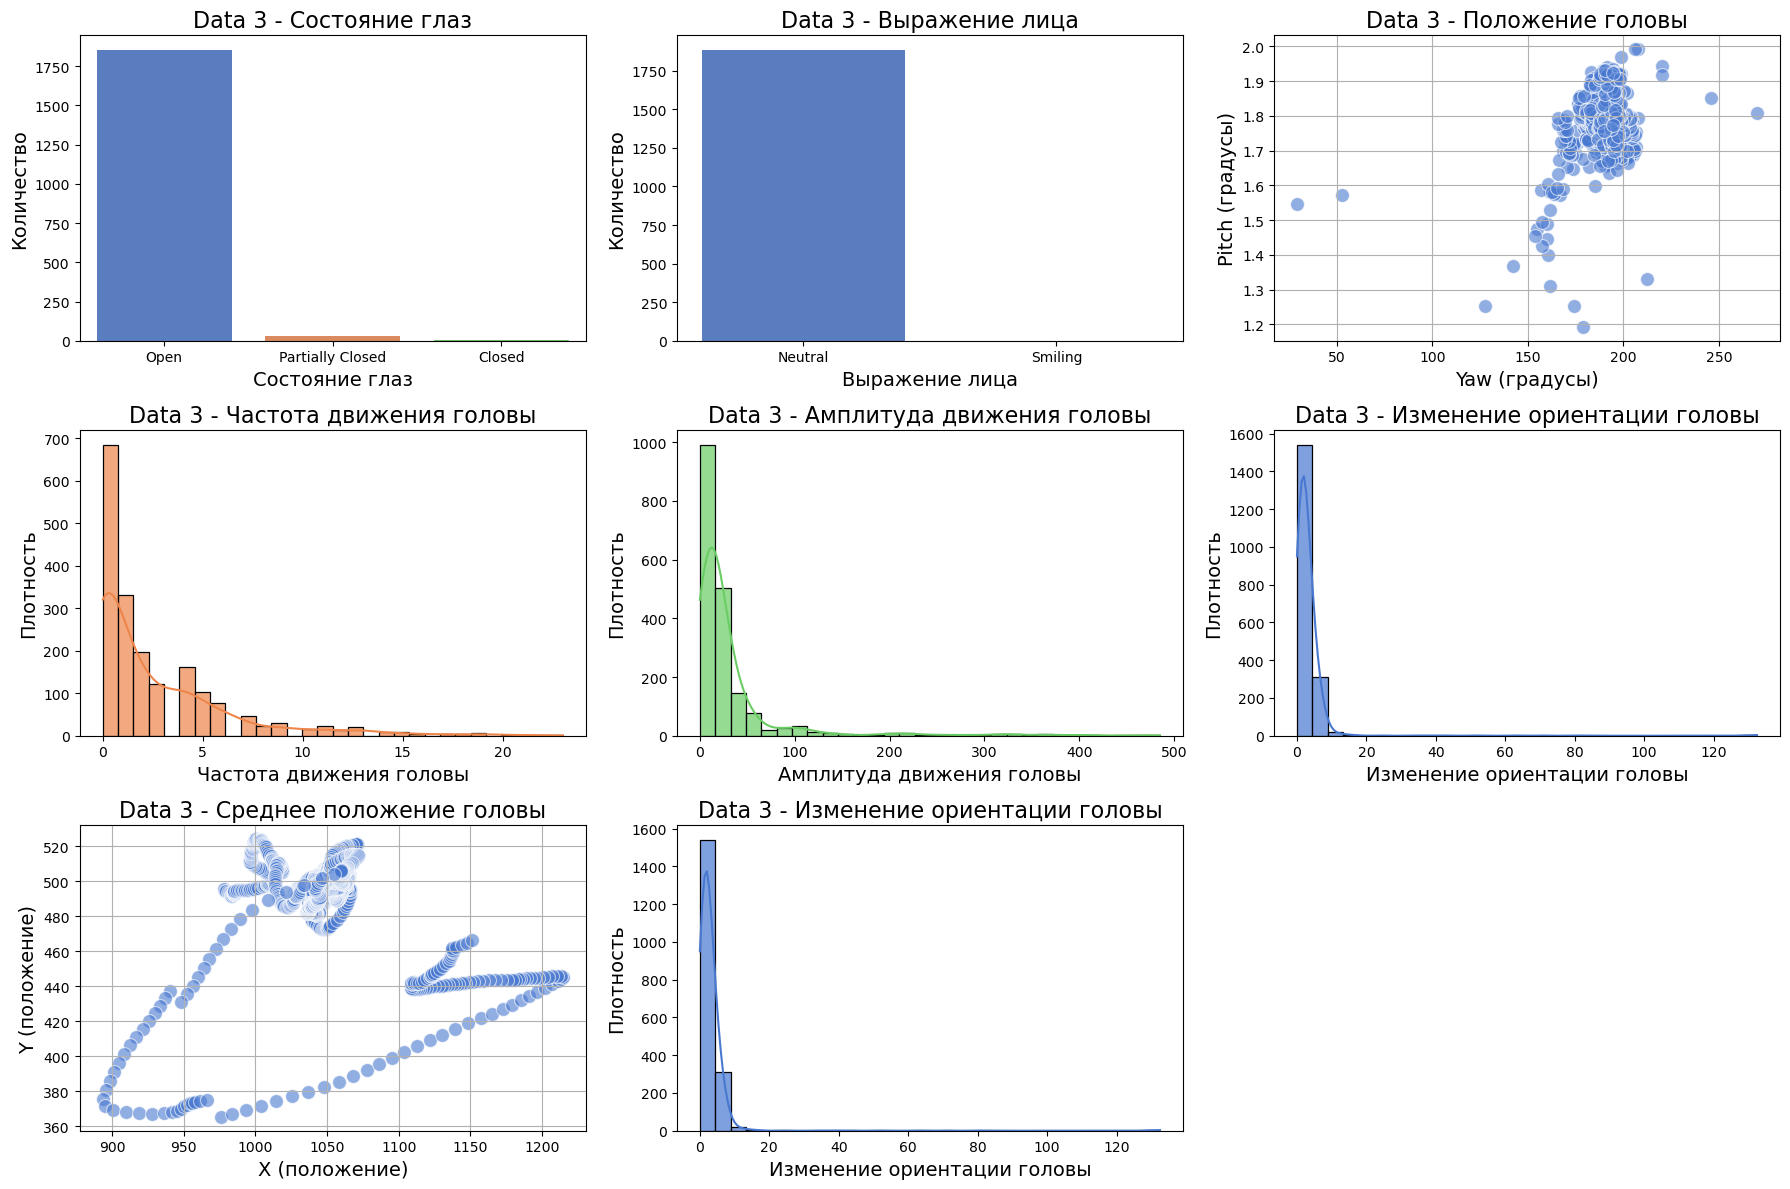

In [27]:
visualize_data2(data3, 'Data 3')


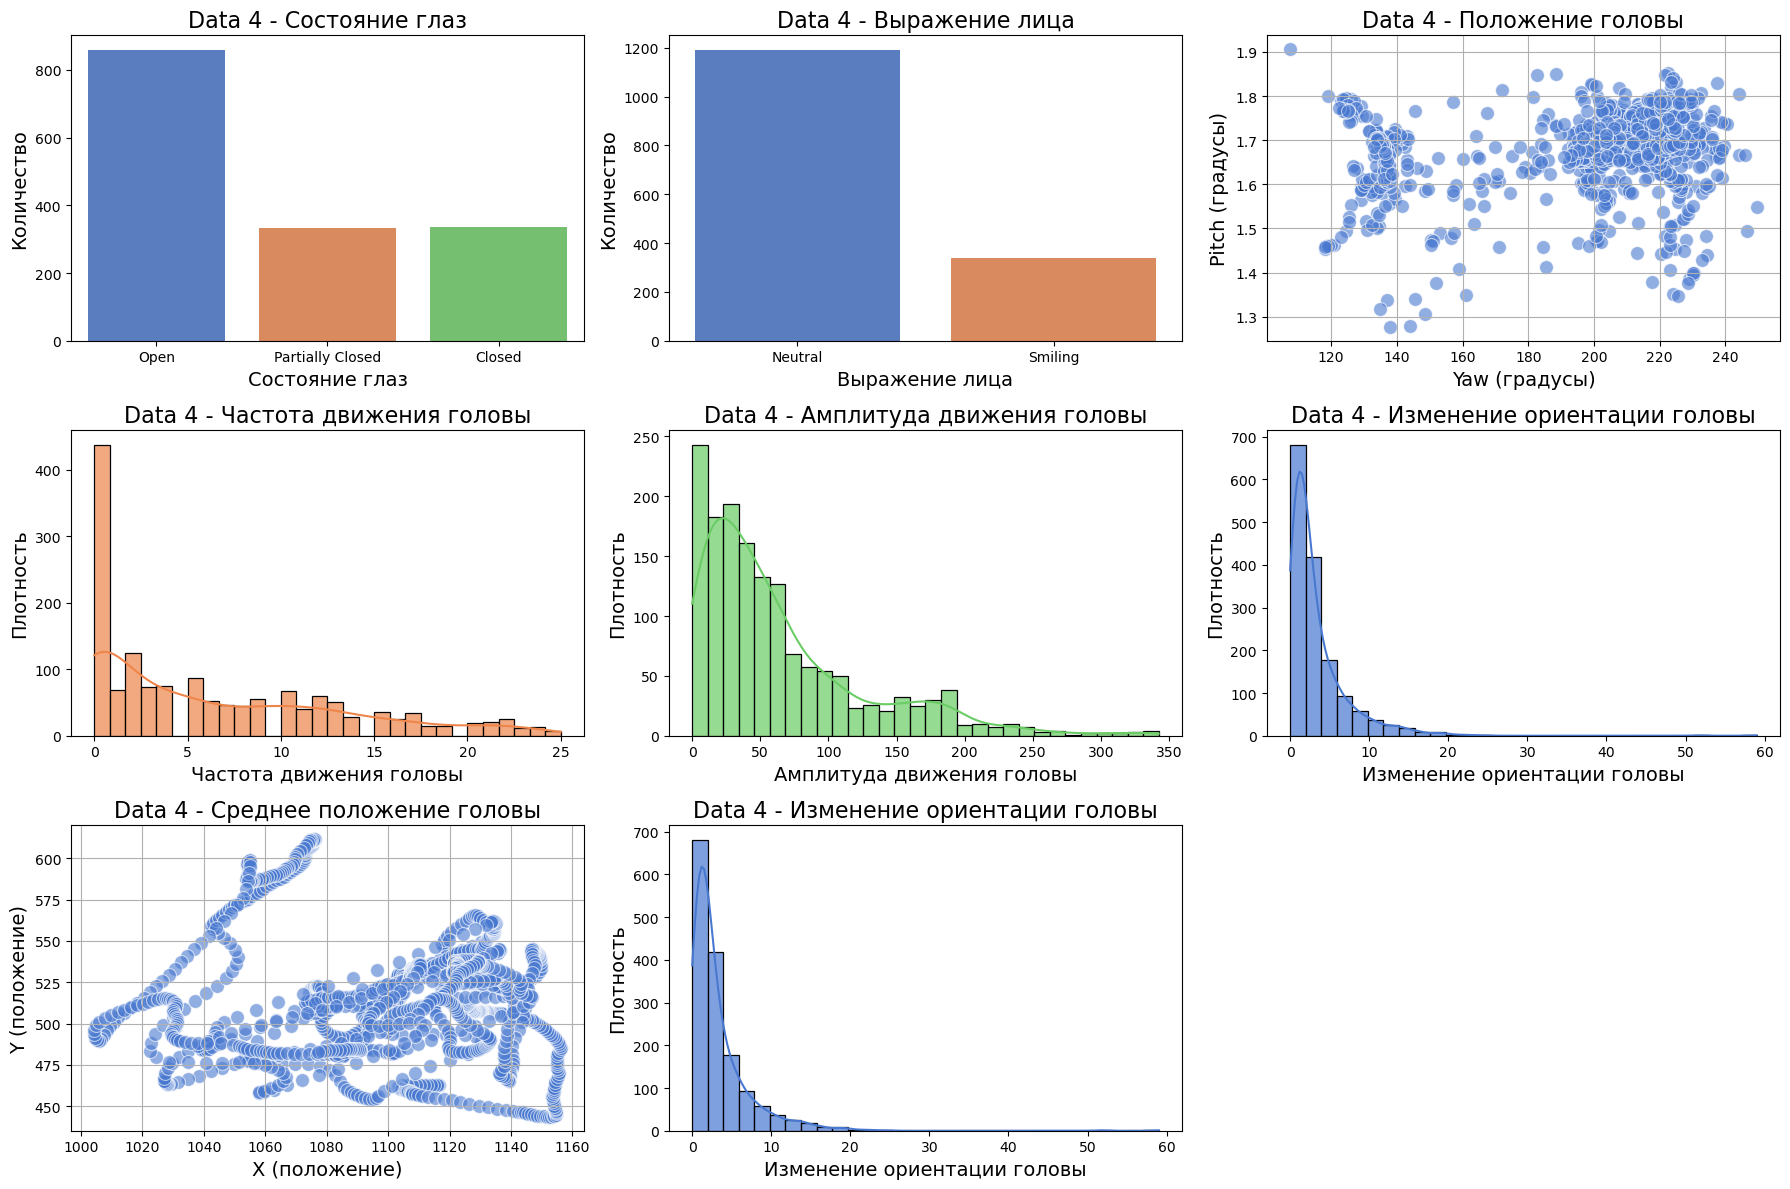

In [28]:
visualize_data2(data4, 'Data 4')


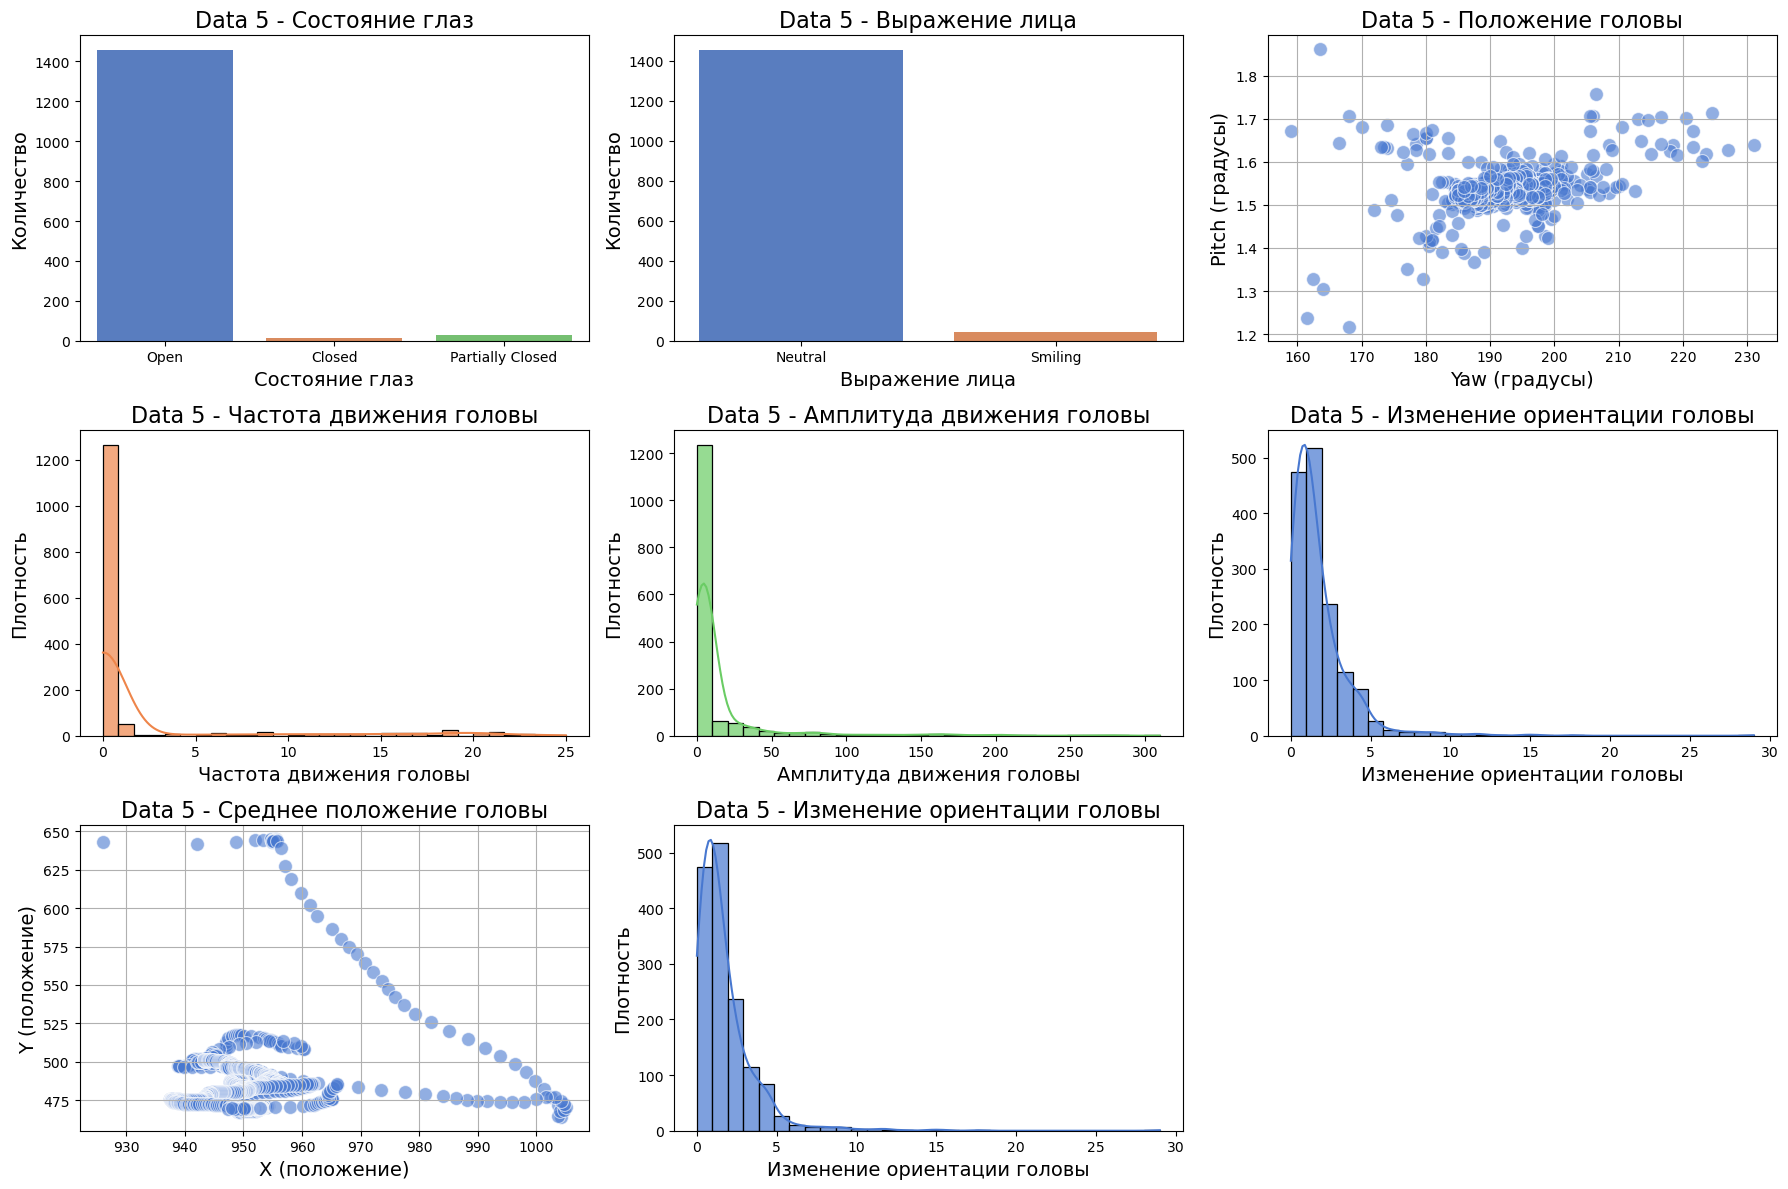

In [29]:
visualize_data2(data5, 'Data 5')


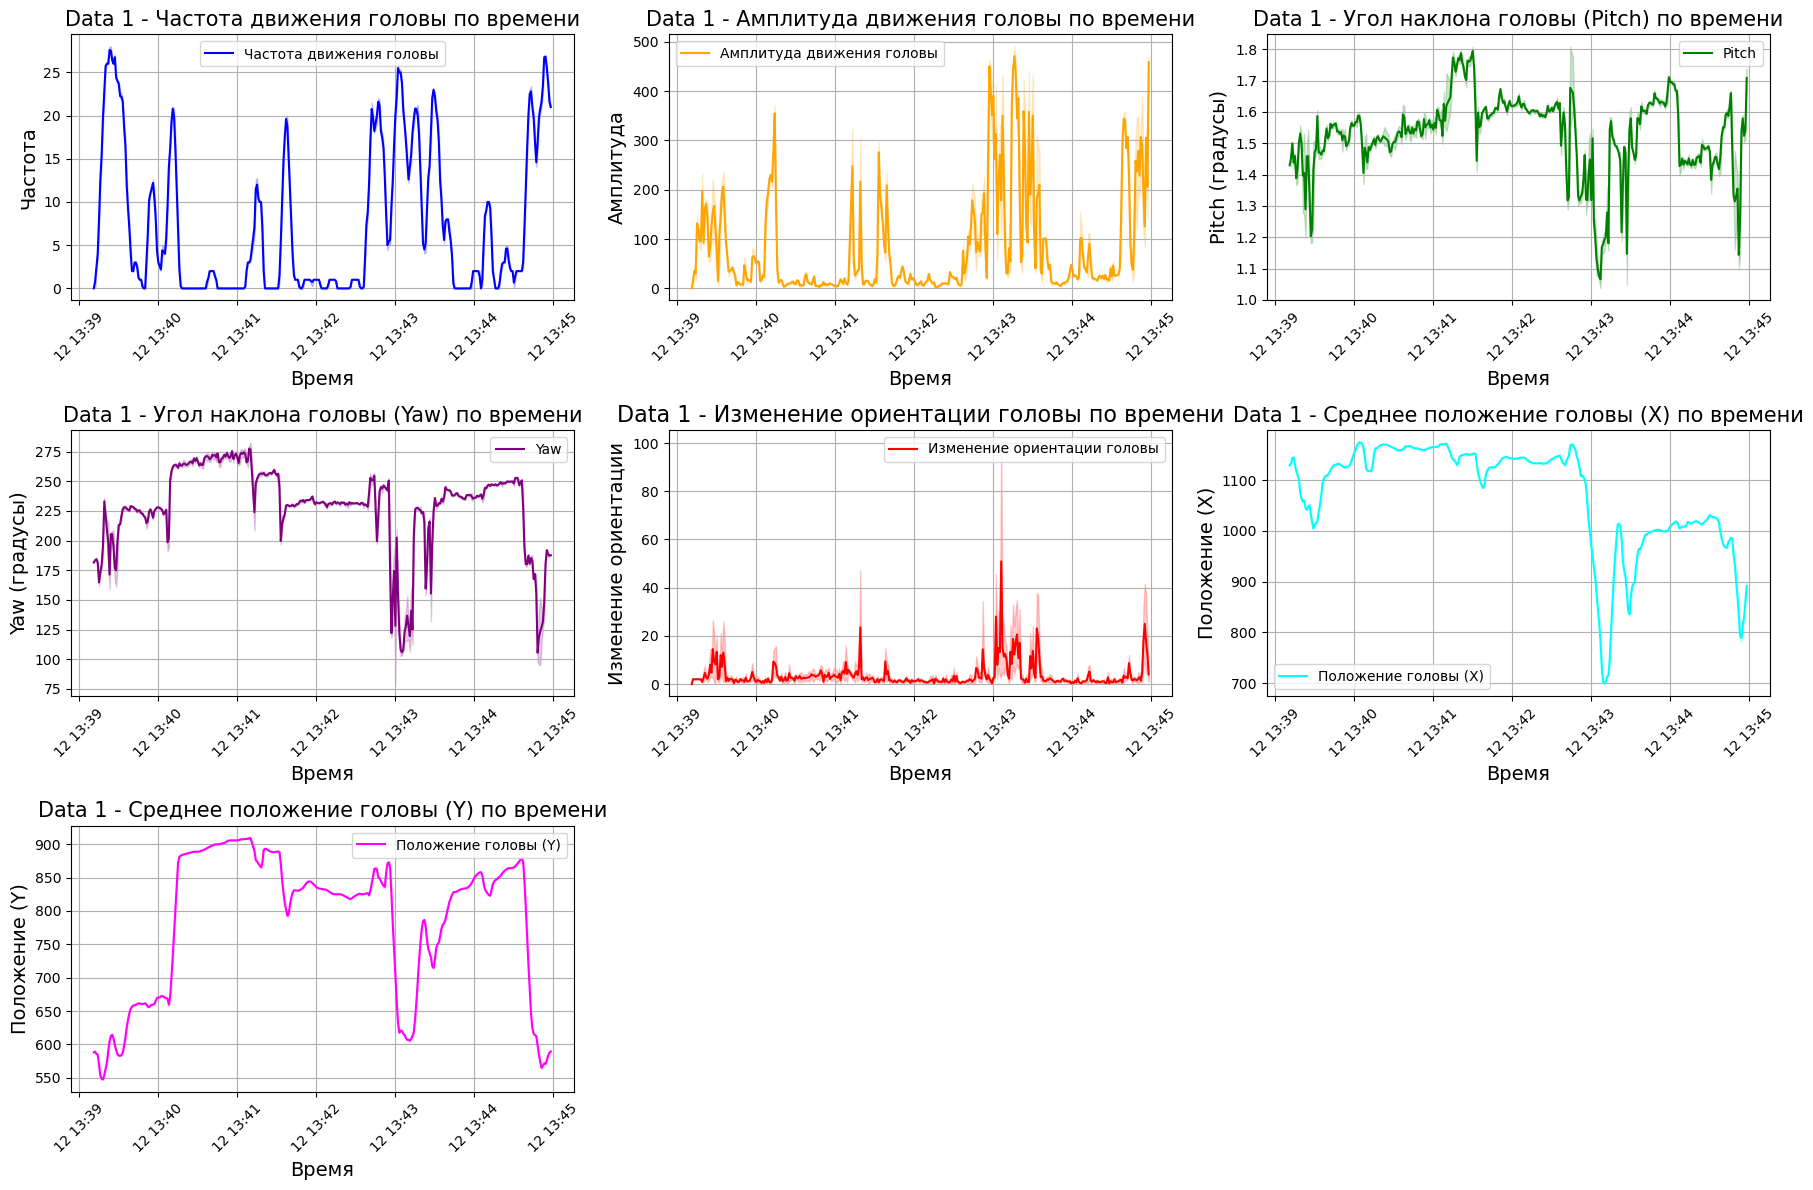

In [30]:
visualize_features_over_time(data1, 'Data 1')

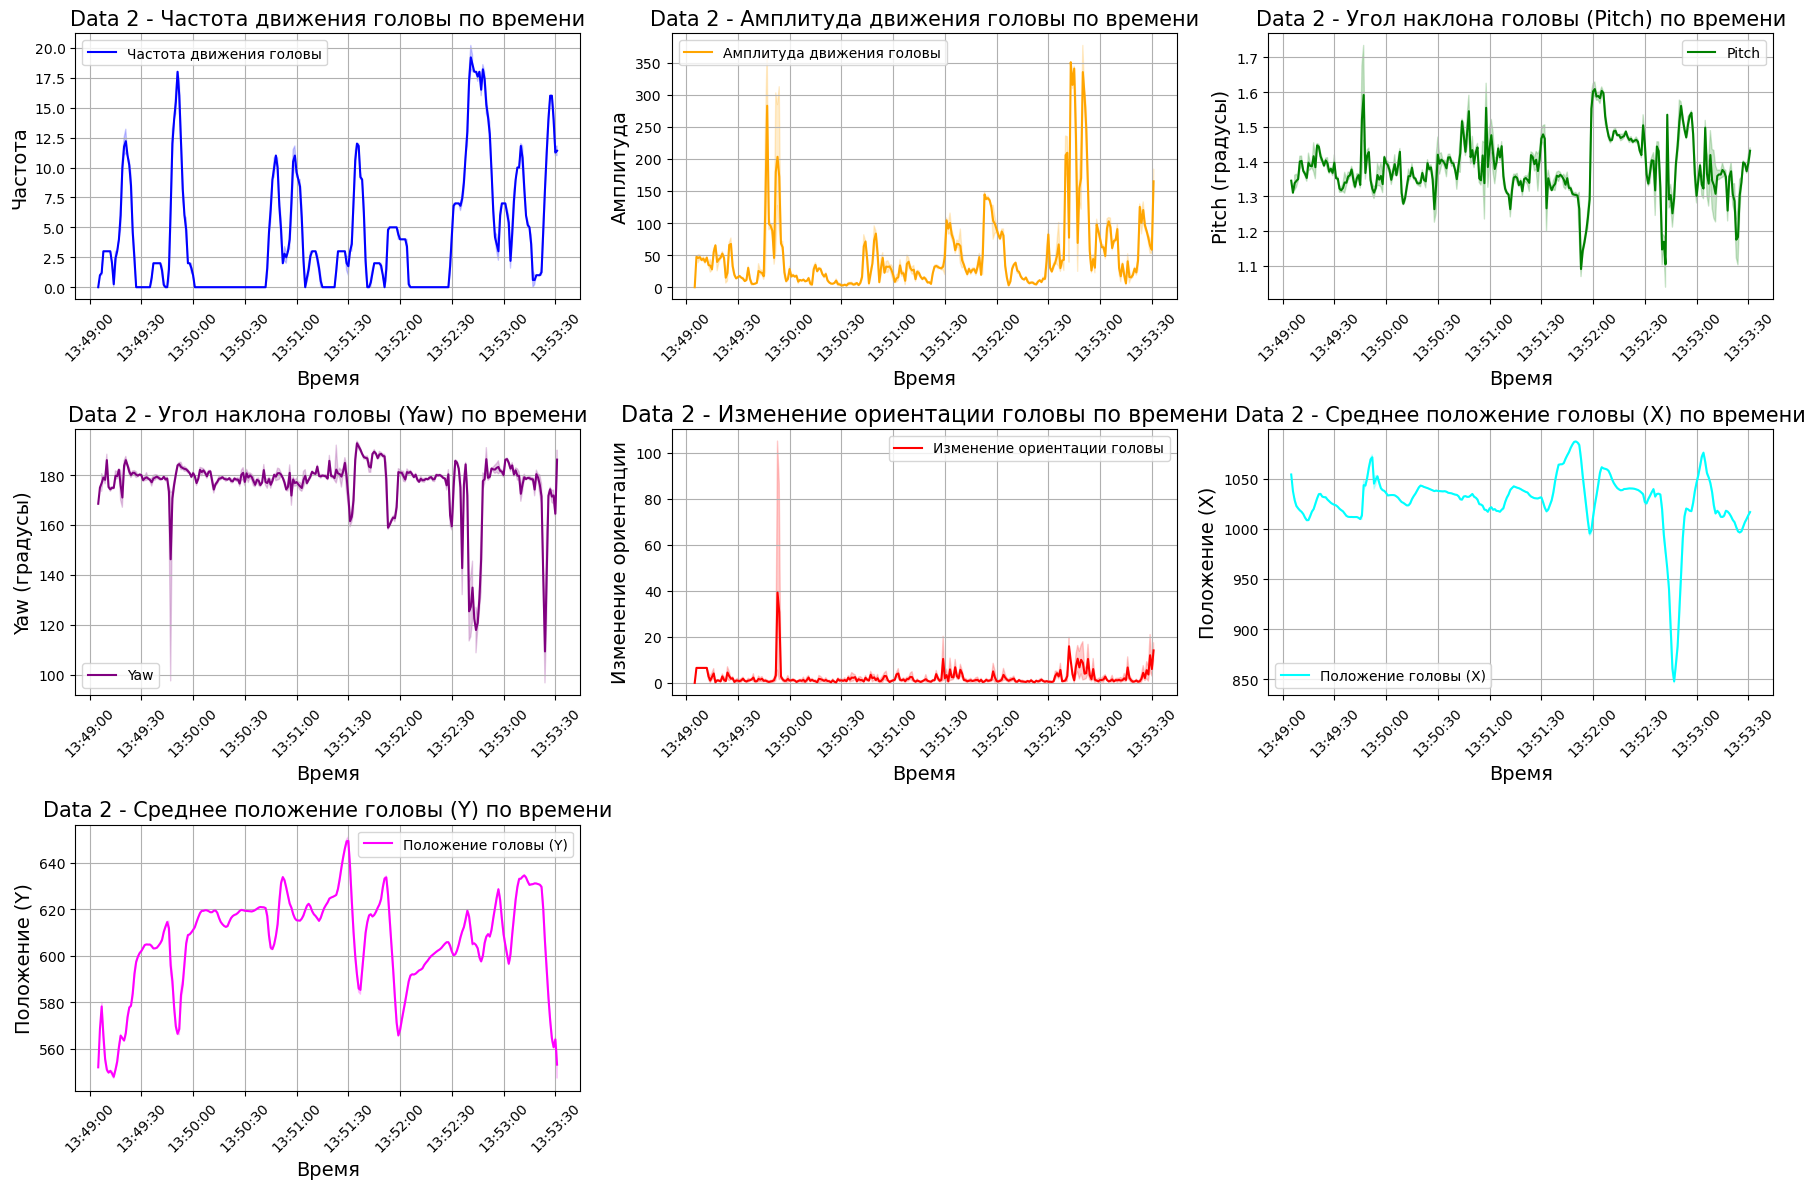

In [31]:
visualize_features_over_time(data2, 'Data 2')

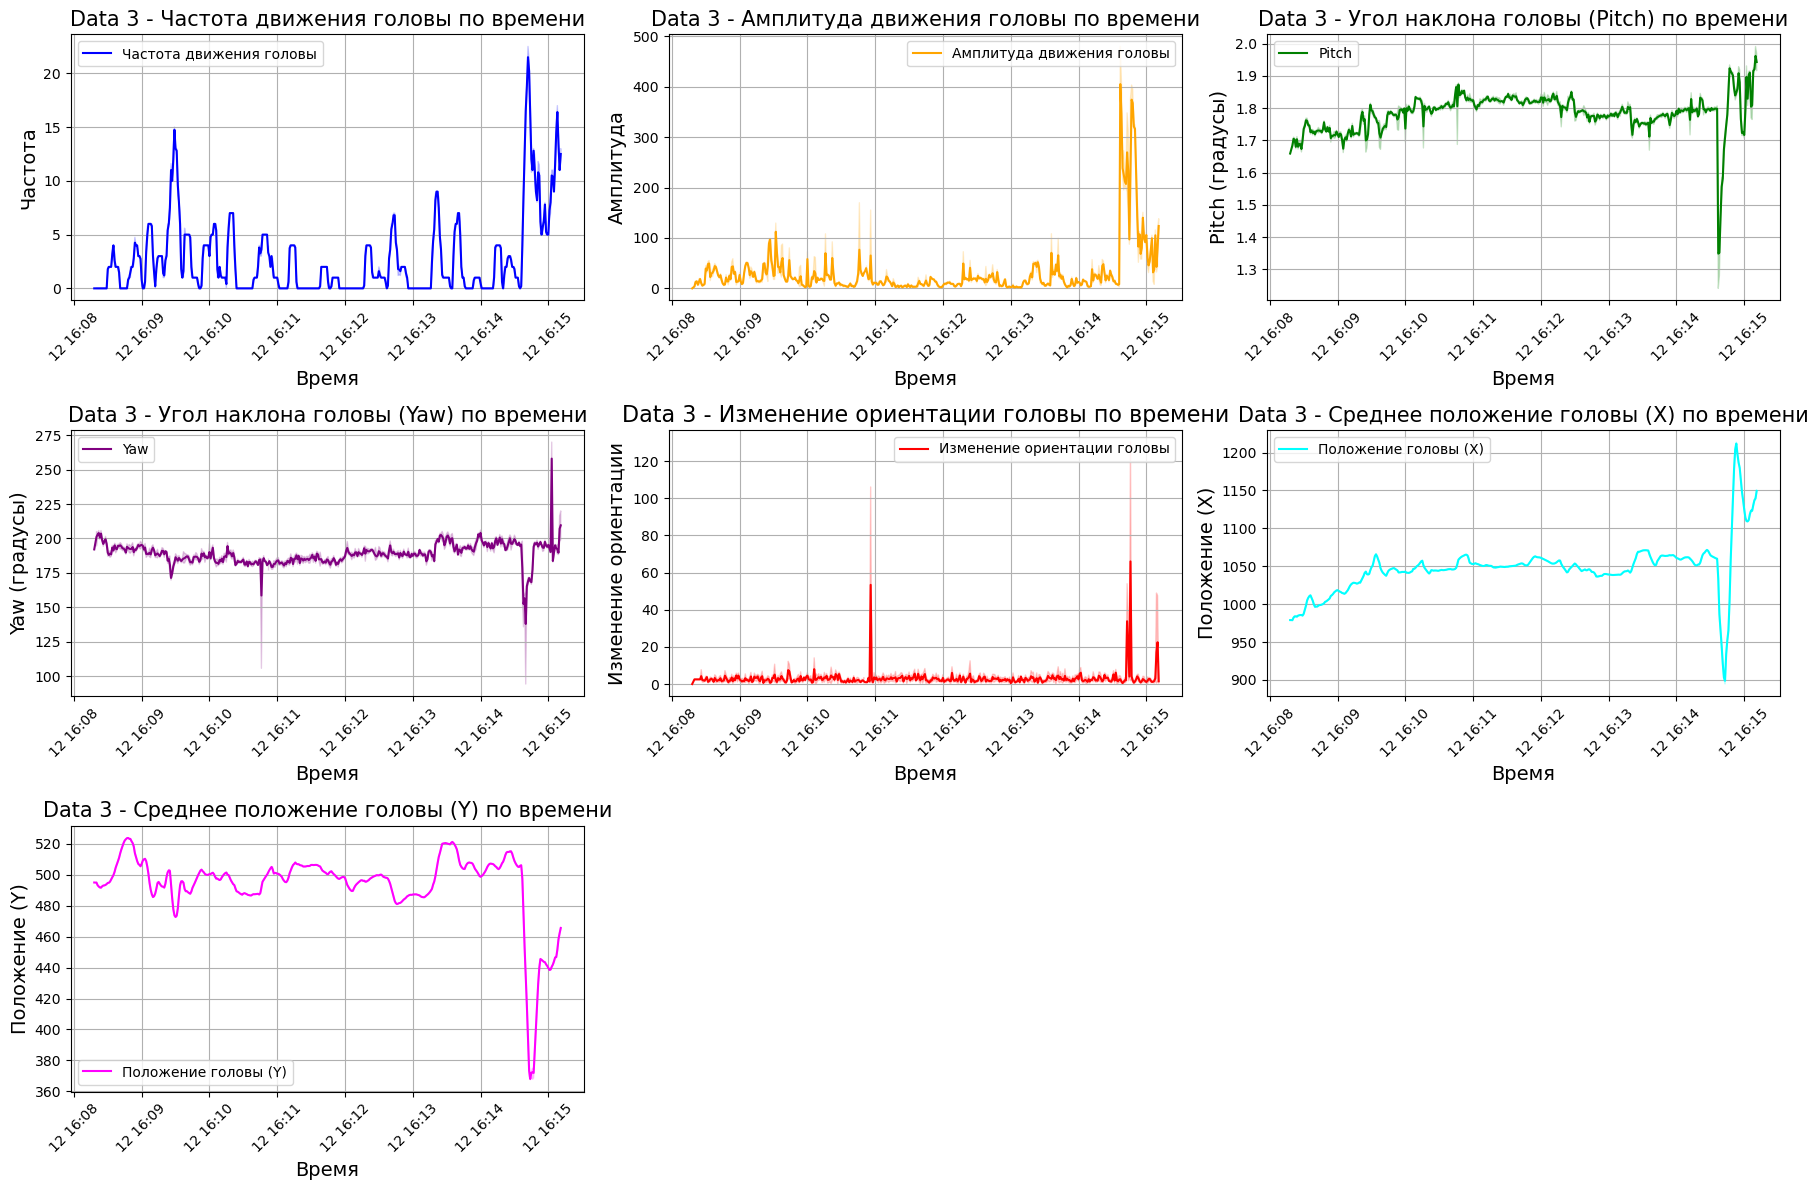

In [32]:
visualize_features_over_time(data3, 'Data 3')

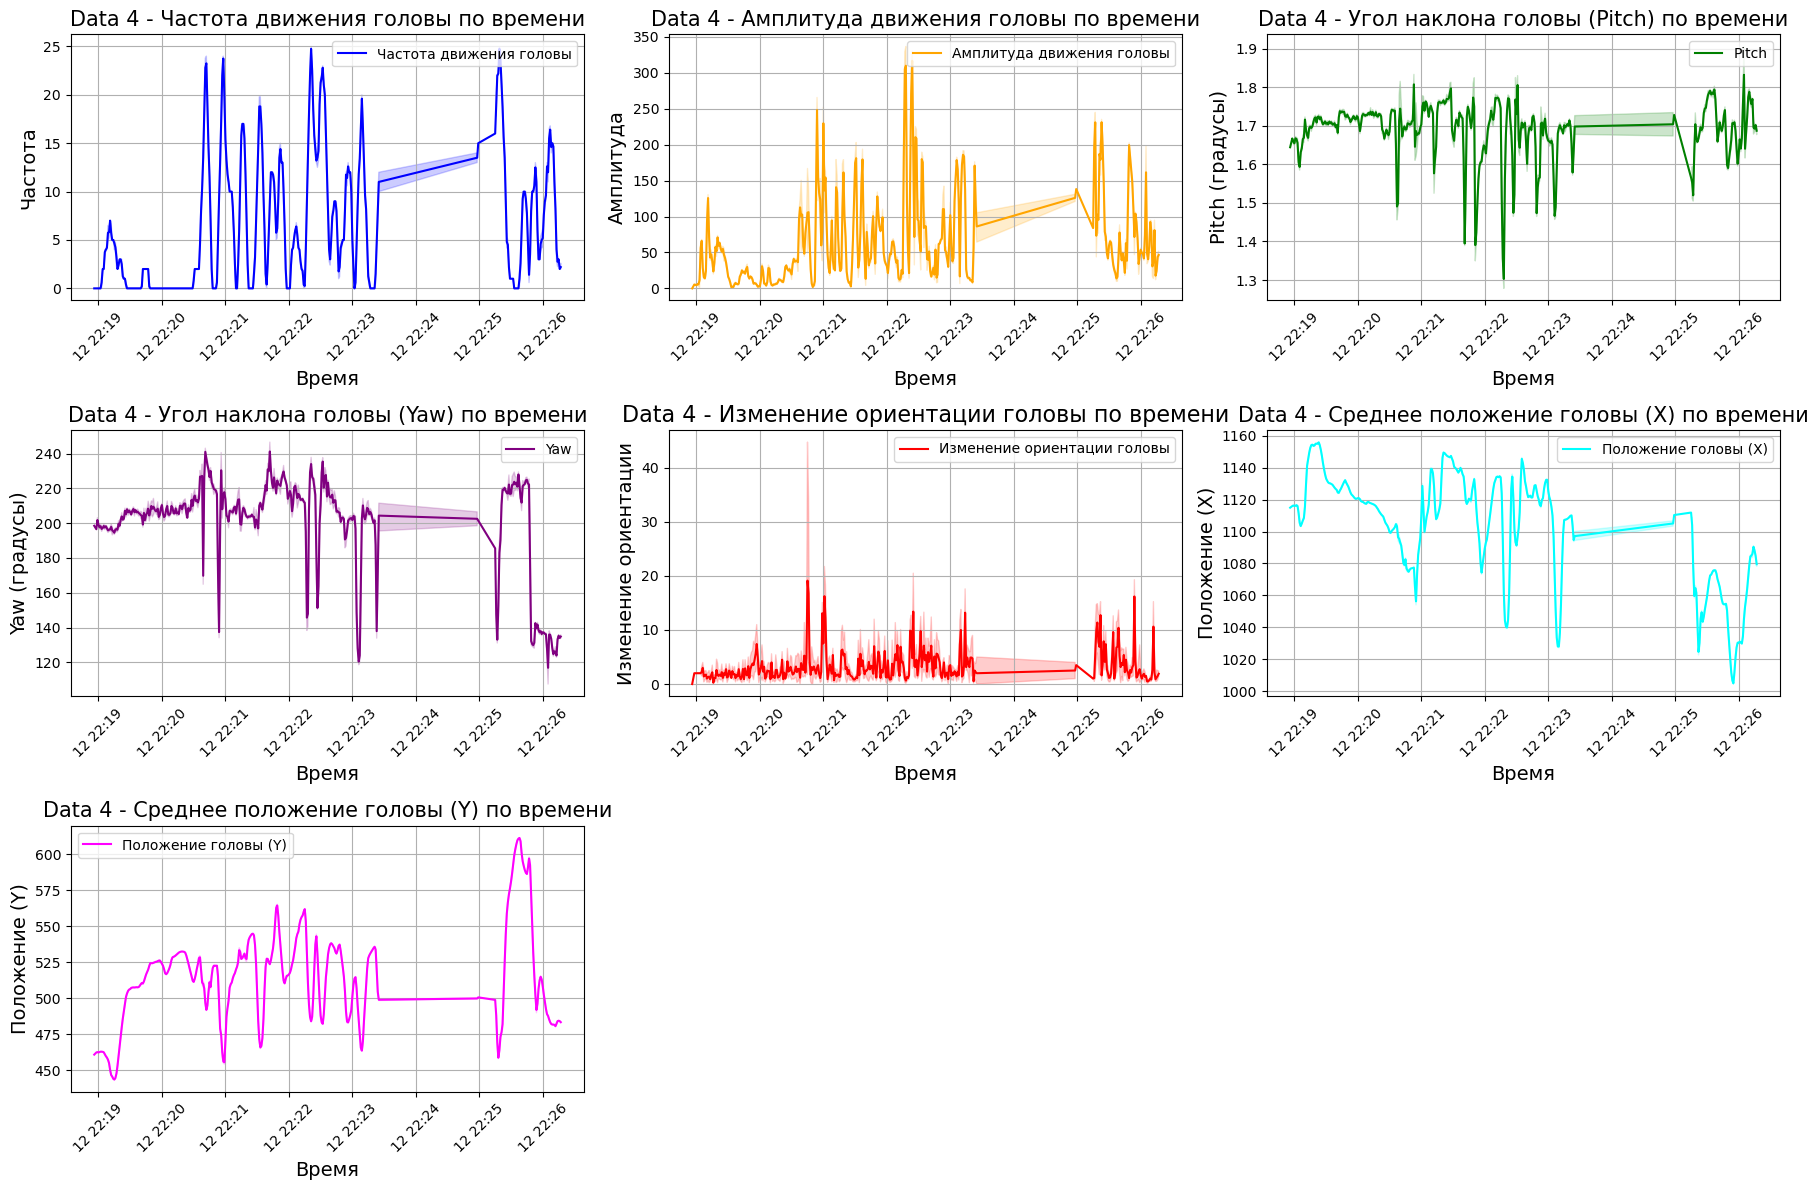

In [33]:
visualize_features_over_time(data4, 'Data 4')

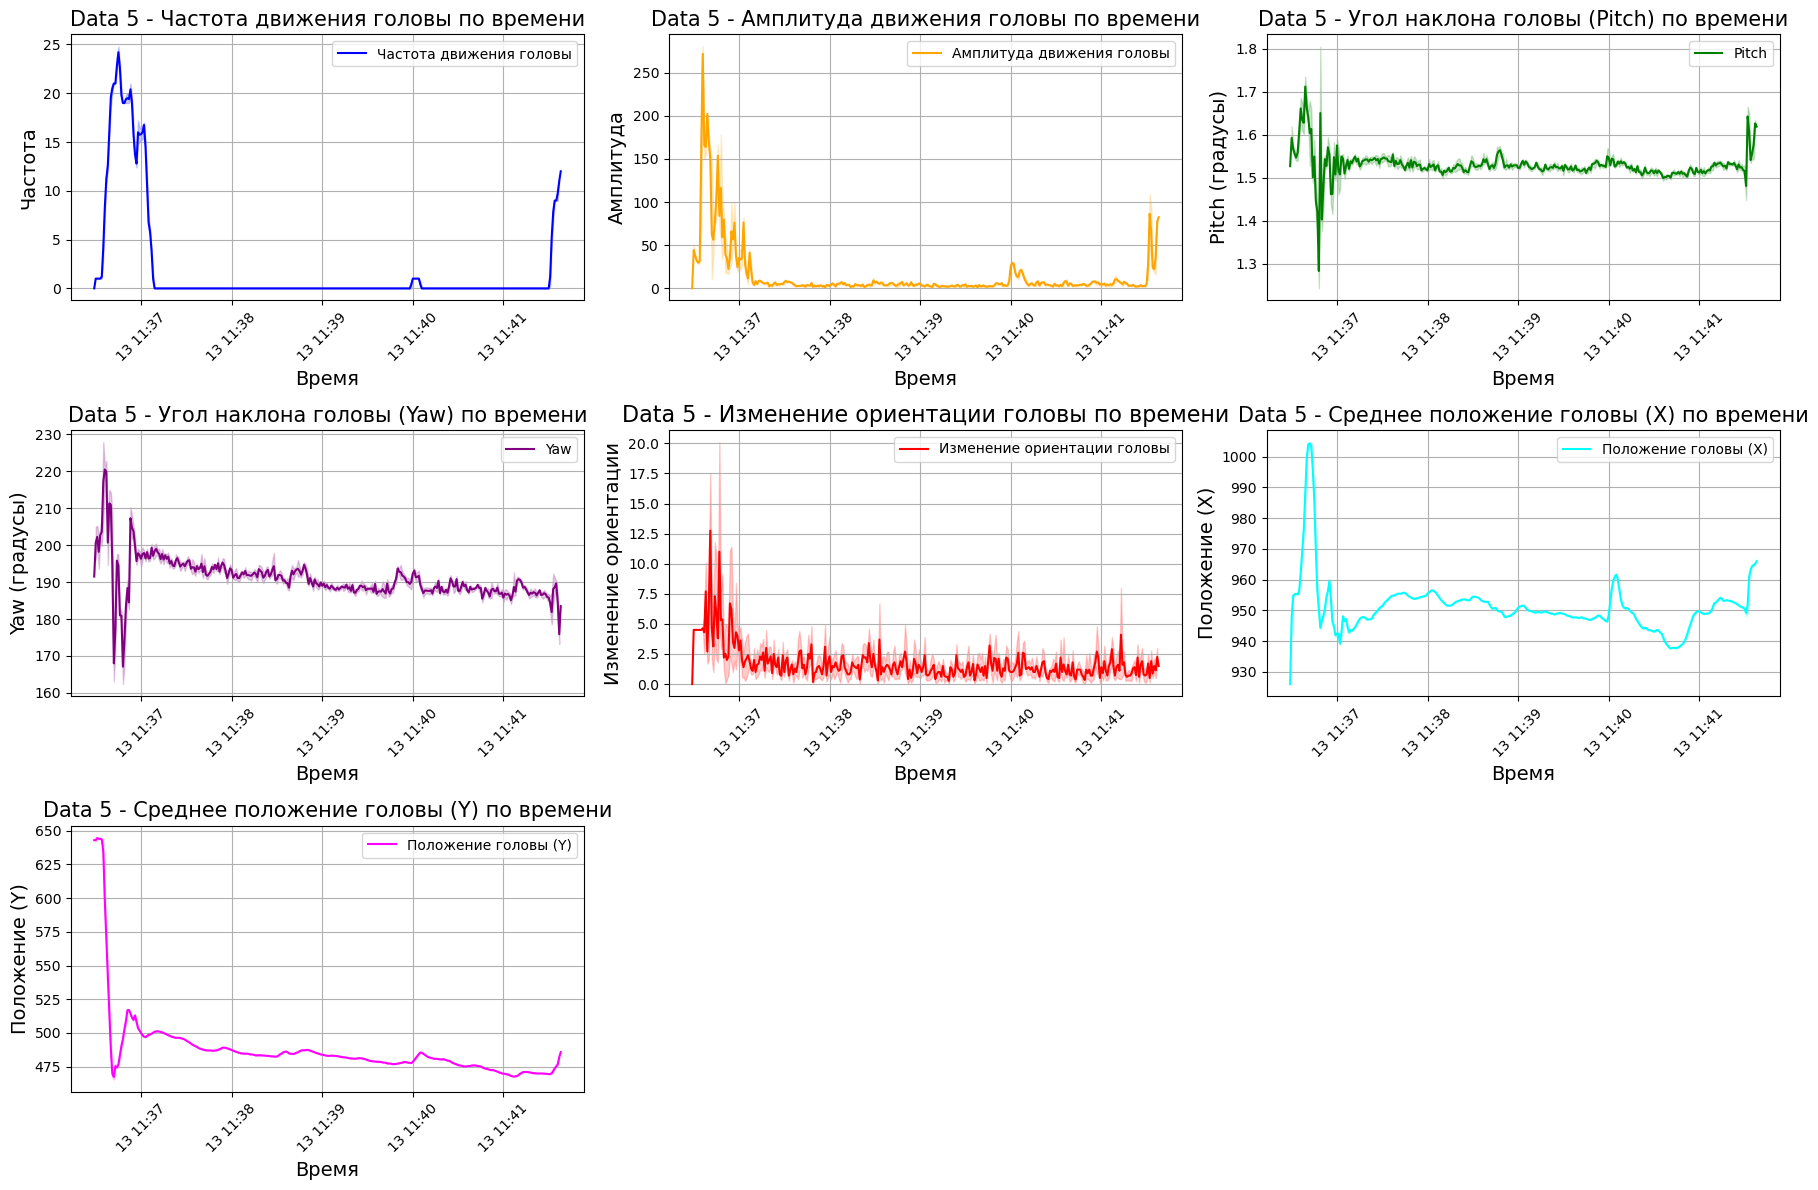

In [34]:
visualize_features_over_time(data5, 'Data 5')

### Data1:
- **Продолжительность**: 5 минут 47 секунд.
- **Результат тестирования**: 8/15.
- **Движения головы**: Средняя частота движений головы (7.2) и амплитуда (80.4) указывают на некоторую нервозность или затруднение с ответами на вопросы. Большое стандартное отклонение (108.7) для амплитуды указывает на высокую изменчивость в движениях головы.
- **Положение головы**: Средние значения угла наклона головы (Pitch и Yaw) показывают незначительные отклонения от нейтрального положения.
- **Состояние глаз**: В основном глаза открыты (1520 из 1599 наблюдений).

### Data2:
- **Продолжительность**: 4 минуты 26 секунд.
- **Результат тестирования**: 7/15.
- **Движения головы**: Средняя частота движений головы (4.2) и амплитуда (49.4) ниже, чем в Data1, что может свидетельствовать о более спокойном состоянии во время теста.
- **Положение головы**: Средние значения угла наклона головы указывают на незначительные отклонения.
- **Состояние глаз**: Преимущественно глаза открыты (1084 из 1236 наблюдений). Зафиксировано частично закрытое состояние глаз.

### Data3:
- **Продолжительность**: 6 минут 53 секунды.
- **Результат тестирования**: 10/15.
- **Движения головы**: Самая низкая средняя частота (2.7) и амплитуда (31.1) движений головы среди всех датасетов. Это может означать высокую концентрацию и уверенность участника.
- **Положение головы**: Средние значения угла наклона головы показывают незначительные отклонения.
- **Состояние глаз**: Почти всегда глаза открыты (1854 из 1886 наблюдений).

### Data4:
- **Продолжительность**: 7 минут 21 секунда. Самый длинный промежуток времени.
- **Результат тестирования**: 7/15.
- **Движения головы**: Средние значения частоты (6.4) и амплитуды (64.0) движений головы находятся между показателями Data1 и Data2.
- **Положение головы**: Средние значения угла наклона головы показывают незначительные отклонения.
- **Состояние глаз**: Значительное количество наблюдений с открытыми глазами (859 из 1529).

### Data5:
- **Продолжительность**: 5 минут 9 секунд.
- **Результат тестирования**: 10/15.
- **Движения головы**: Самая низкая средняя частота движений головы (1.8) и небольшая амплитуда (14.3). Это свидетельствует о высокой концентрации и спокойствии.
- **Положение головы**: Средние значения угла наклона головы показывают незначительные отклонения.
- **Состояние глаз**: Почти всегда глаза открыты (1458 из 1499 наблюдений).

### Общие выводы:
- Участники, демонстрировавшие высокую частоту и амплитуду движений головы, как правило, показывали более низкие результаты на тестах, что может указывать на нервозность или затруднения.
- Участники с низкой частотой и амплитудой движений головы, как в Data3 и Data5, продемонстрировали высокие результаты, что может говорить о их уверенности и сосредоточенности.


In [35]:
def aggregate_data(data, test_score):
    aggregated = {}
    # Обработка Head Pose
    aggregated['Pitch_mean'] = data['Head Pose (Pitch)'].mean()
    aggregated['Yaw_mean'] = data['Head Pose (Yaw)'].mean()

    aggregated['Head Movement Frequency_mean'] = data['Head Movement Frequency'].mean()
    aggregated['Head Movement Amplitude_mean'] = data['Head Movement Amplitude'].mean()
    aggregated['Head Orientation Change_mean'] = data['Head Orientation Change'].mean()

    avg_head_position = data[['Average Head Position (X)', 'Average Head Position (Y)']].mean()
    aggregated['Avg_Head_X_mean'] = avg_head_position['Average Head Position (X)']
    aggregated['Avg_Head_Y_mean'] = avg_head_position['Average Head Position (Y)']

    eye_state_counts = data['Eye State'].value_counts()
    for state, count in eye_state_counts.items():
        aggregated[f'EyeState_{state}_proportion'] = count / len(data)

    expression_counts = data['Expression'].value_counts()
    for expression, count in expression_counts.items():
        aggregated[f'Expression_{expression}_proportion'] = count / len(data)

    aggregated['Test_Score'] = test_score # Add the test score
    return pd.Series(aggregated)

test_scores = [8/15, 7/15, 10/15, 7/15, 10/15]

aggregated_data1 = aggregate_data(data1, test_scores[0])
aggregated_data2 = aggregate_data(data2, test_scores[1])
aggregated_data3 = aggregate_data(data3, test_scores[2])
aggregated_data4 = aggregate_data(data4, test_scores[3])
aggregated_data5 = aggregate_data(data5, test_scores[4])

In [36]:
aggregated_data1

Pitch_mean                                 1.527026
Yaw_mean                                 228.657911
Head Movement Frequency_mean               7.194497
Head Movement Amplitude_mean              80.417023
Head Orientation Change_mean               3.576510
Avg_Head_X_mean                         1070.678144
Avg_Head_Y_mean                          785.809017
EyeState_Open_proportion                   0.950594
EyeState_Partially Closed_proportion       0.038149
EyeState_Closed_proportion                 0.011257
Expression_Neutral_proportion              0.889306
Expression_Smiling_proportion              0.110694
Test_Score                                 0.533333
dtype: float64

In [37]:
aggregated_data2

Pitch_mean                                 1.382519
Yaw_mean                                 176.807443
Head Movement Frequency_mean               4.220874
Head Movement Amplitude_mean              49.373978
Head Orientation Change_mean               2.262280
Avg_Head_X_mean                         1028.363298
Avg_Head_Y_mean                          606.875726
EyeState_Open_proportion                   0.877023
EyeState_Partially Closed_proportion       0.107605
EyeState_Closed_proportion                 0.015372
Expression_Neutral_proportion              0.995146
Expression_Smiling_proportion              0.004854
Test_Score                                 0.466667
dtype: float64

In [38]:
aggregated_data3

Pitch_mean                                 1.782990
Yaw_mean                                 188.777572
Head Movement Frequency_mean               2.676034
Head Movement Amplitude_mean              31.088532
Head Orientation Change_mean               3.047837
Avg_Head_X_mean                         1047.059137
Avg_Head_Y_mean                          493.654096
EyeState_Open_proportion                   0.983033
EyeState_Partially Closed_proportion       0.015376
EyeState_Closed_proportion                 0.001591
Expression_Neutral_proportion              0.999470
Expression_Smiling_proportion              0.000530
Test_Score                                 0.666667
dtype: float64

In [39]:
aggregated_data4

Pitch_mean                                 1.690551
Yaw_mean                                 200.778286
Head Movement Frequency_mean               6.415304
Head Movement Amplitude_mean              63.997158
Head Orientation Change_mean               3.283006
Avg_Head_X_mean                         1103.328367
Avg_Head_Y_mean                          515.756128
EyeState_Open_proportion                   0.561805
EyeState_Closed_proportion                 0.220405
EyeState_Partially Closed_proportion       0.217789
Expression_Neutral_proportion              0.778940
Expression_Smiling_proportion              0.221060
Test_Score                                 0.466667
dtype: float64

In [40]:
aggregated_data5

Pitch_mean                                1.529536
Yaw_mean                                190.983322
Head Movement Frequency_mean              1.799867
Head Movement Amplitude_mean             14.304006
Head Orientation Change_mean              1.720463
Avg_Head_X_mean                         951.104175
Avg_Head_Y_mean                         486.817828
EyeState_Open_proportion                  0.972648
EyeState_Partially Closed_proportion      0.018679
EyeState_Closed_proportion                0.008672
Expression_Neutral_proportion             0.970647
Expression_Smiling_proportion             0.029353
Test_Score                                0.666667
dtype: float64

In [41]:
aggregated_results = pd.DataFrame({
    'Dataset': ['Data 1', 'Data 2', 'Data 3', 'Data 4', 'Data 5'],
    'Pitch_mean': [aggregated_data1['Pitch_mean'], aggregated_data2['Pitch_mean'], 
                   aggregated_data3['Pitch_mean'], aggregated_data4['Pitch_mean'], 
                   aggregated_data5['Pitch_mean']],
    'Yaw_mean': [aggregated_data1['Yaw_mean'], aggregated_data2['Yaw_mean'], 
                 aggregated_data3['Yaw_mean'], aggregated_data4['Yaw_mean'], 
                 aggregated_data5['Yaw_mean']],
    'Head Movement Frequency_mean': [aggregated_data1['Head Movement Frequency_mean'], 
                                     aggregated_data2['Head Movement Frequency_mean'], 
                                     aggregated_data3['Head Movement Frequency_mean'], 
                                     aggregated_data4['Head Movement Frequency_mean'], 
                                     aggregated_data5['Head Movement Frequency_mean']],
    'Head Movement Amplitude_mean': [aggregated_data1['Head Movement Amplitude_mean'], 
                                      aggregated_data2['Head Movement Amplitude_mean'], 
                                      aggregated_data3['Head Movement Amplitude_mean'], 
                                      aggregated_data4['Head Movement Amplitude_mean'], 
                                      aggregated_data5['Head Movement Amplitude_mean']],
    'Test_Score': [aggregated_data1['Test_Score'], aggregated_data2['Test_Score'], 
                   aggregated_data3['Test_Score'], aggregated_data4['Test_Score'], 
                   aggregated_data5['Test_Score']]
})

aggregated_results


Dataset  Pitch_mean    Yaw_mean  Head Movement Frequency_mean  \
0  Data 1    1.527026  228.657911                      7.194497   
1  Data 2    1.382519  176.807443                      4.220874   
2  Data 3    1.782990  188.777572                      2.676034   
3  Data 4    1.690551  200.778286                      6.415304   
4  Data 5    1.529536  190.983322                      1.799867   

   Head Movement Amplitude_mean  Test_Score  
0                     80.417023    0.533333  
1                     49.373978    0.466667  
2                     31.088532    0.666667  
3                     63.997158    0.466667  
4                     14.304006    0.666667

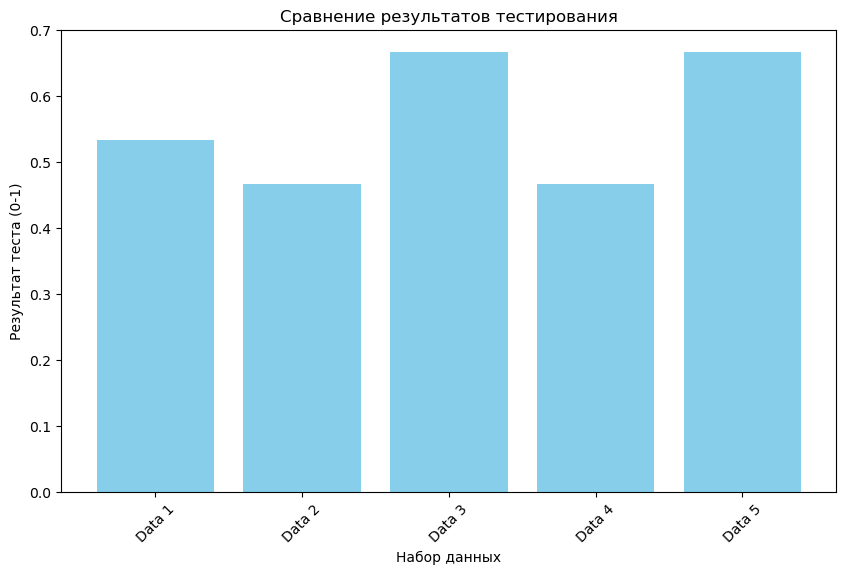

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(aggregated_results['Dataset'], aggregated_results['Test_Score'], color='skyblue')
plt.title('Сравнение результатов тестирования')
plt.xlabel('Набор данных')
plt.ylabel('Результат теста (0-1)')
plt.xticks(rotation=45)
plt.show()

Корреляция Пирсона:



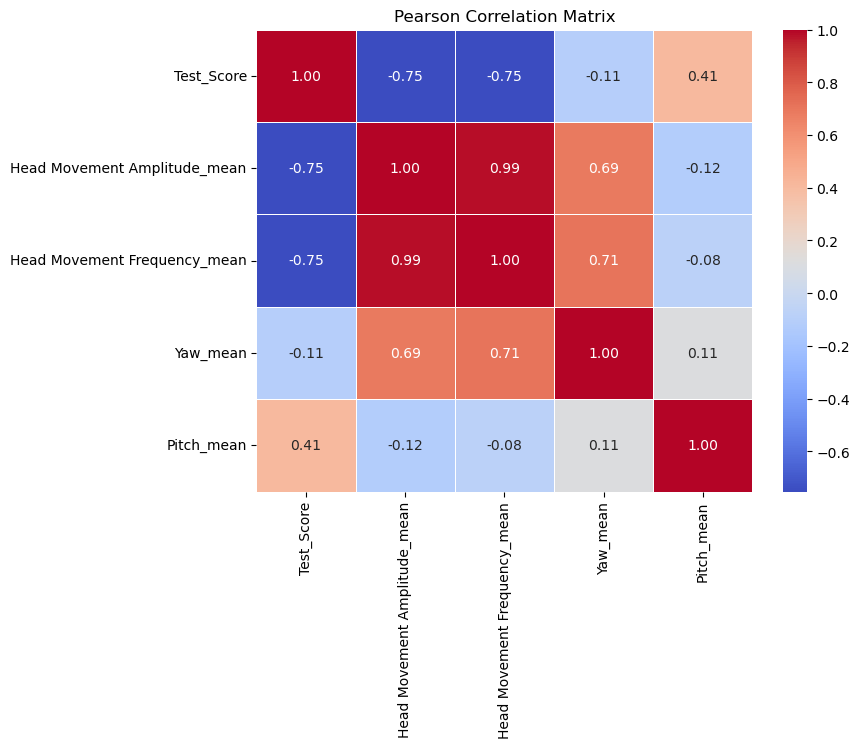

In [43]:
correlation_matrix = aggregated_results[['Test_Score', 'Head Movement Amplitude_mean', 'Head Movement Frequency_mean',  'Yaw_mean','Pitch_mean']].corr(method='pearson')
print("Корреляция Пирсона:\n")
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()


Корреляция Спирмена:



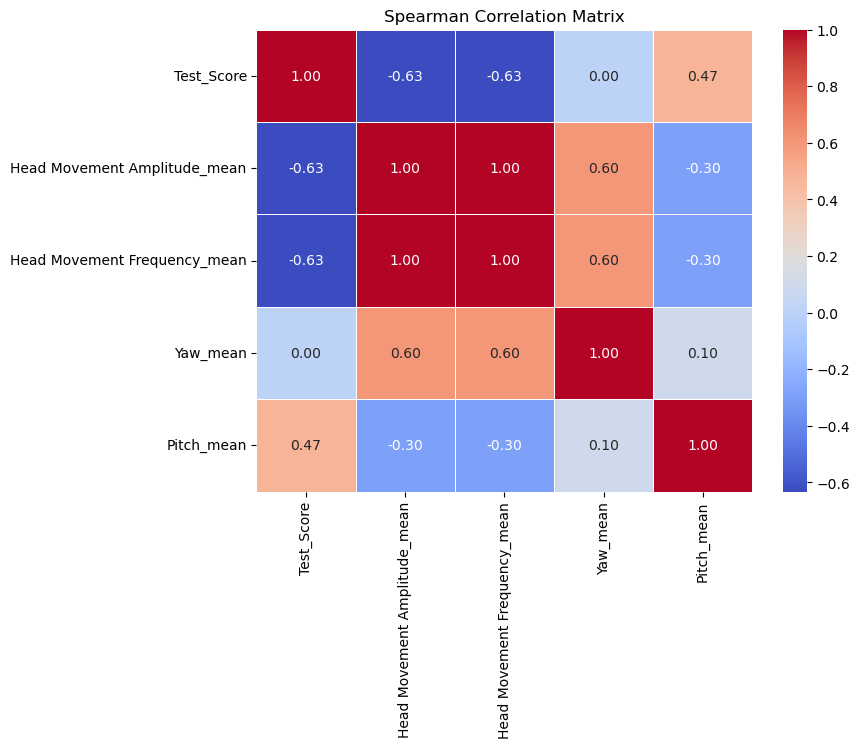

In [44]:
correlation_matrix = aggregated_results[['Test_Score', 'Head Movement Amplitude_mean', 'Head Movement Frequency_mean',  'Yaw_mean','Pitch_mean']].corr(method='spearman')
print("\nКорреляция Спирмена:\n")
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix')
plt.show()

### Ключевые моменты 

1. **Корреляция Пирсона**:
   - **Сильная отрицательная корреляция** между Test_Score и Head Movement Amplitude_mean (-0.746) и Head Movement Frequency_mean (-0.752) указывает на то, что участники с более активными движениями головы имеют худшие результаты теста.
   - **Слабая отрицательная корреляция** с Yaw_mean (-0.105) говорит о незначительном влиянии вращения головы на результаты.
   - **Умеренная положительная корреляция** с Pitch_mean (0.408) может предполагать, что более высокий наклон головы связан с более высокими оценками.

2. **Корреляция Спирмена**:
   - Подтверждает тенденции, выявленные в корреляции Пирсона, но с некоторыми отличиями: 
     - Сильная отрицательная корреляция с Amplitude_mean и Frequency_mean (-0.632) указывает на возможное влияние выбросов на результаты Пирсона.
     - Корреляция с Yaw_mean равна нулю, что может свидетельствовать о том, что данные по Yaw не имеют значимой связи с результатами теста.
     - Умеренная положительная корреляция с Pitch_mean (0.474) немного сильнее, чем в случае Пирсона.

3. **Взаимосвязи между параметрами движения головы**:
   - Идеальная положительная корреляция (1.0) между Amplitude_mean и Frequency_mean указывает на то, что увеличение амплитуды движений головы всегда сопровождается увеличением их частоты.

### Выводы

- **Сильная отрицательная связь** между движениями головы и оценкой теста является важным результатом, который следует учитывать при интерпретации данных.
- **Различия между методами** могут указывать на наличие выбросов или нелинейных зависимостей, что требует дополнительного анализа.
- **Необходимость в дальнейшем исследовании** для понимания влияния наклона головы (Pitch) и причин расхождения в корреляциях Yaw_mean.



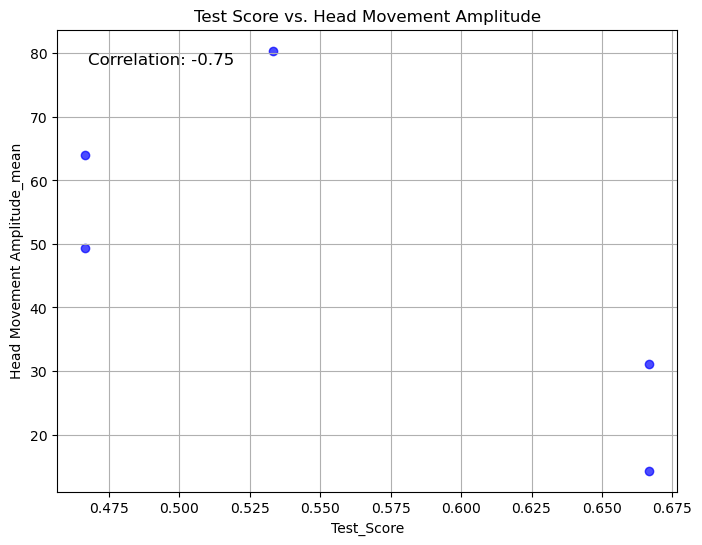

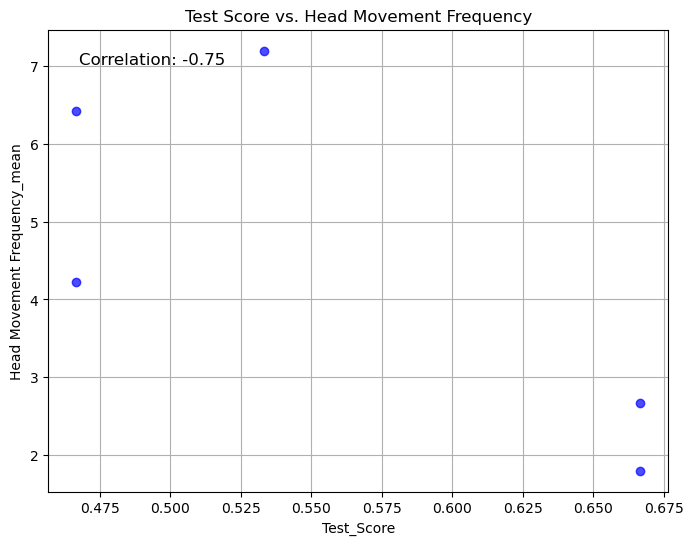

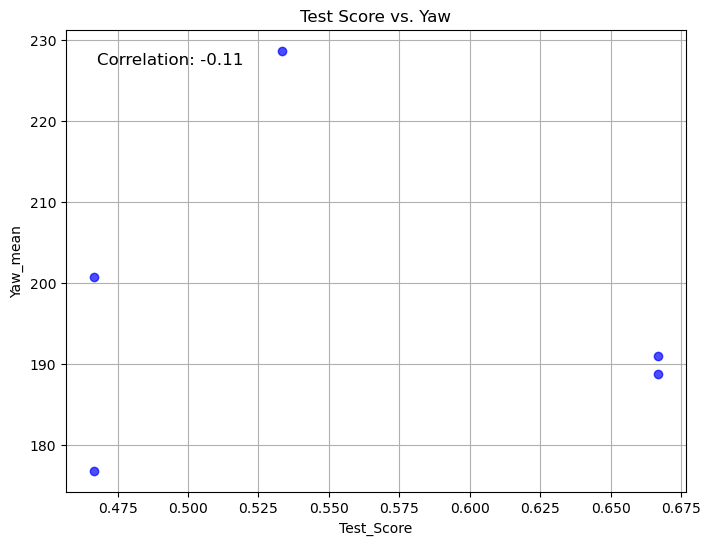

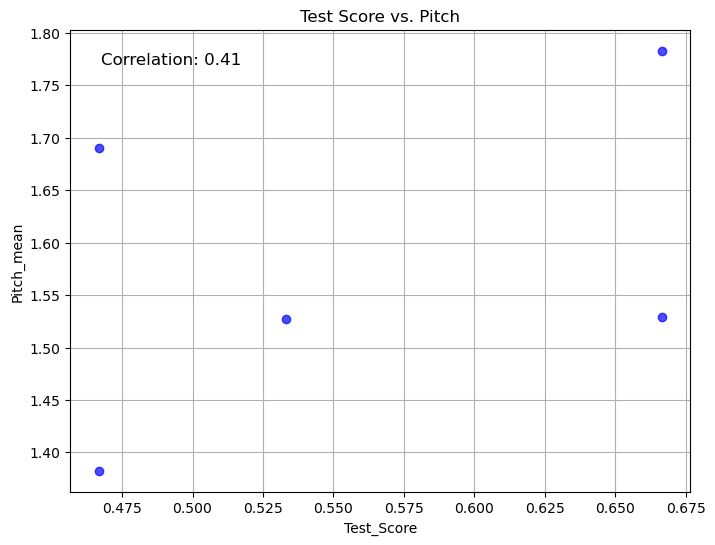

In [48]:
def create_scatter_plot(x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(aggregated_results[x_col], aggregated_results[y_col], color='blue', alpha=0.7)
    
    # Рассчитываем коэффициент корреляции
    correlation = np.corrcoef(aggregated_results[x_col], aggregated_results[y_col])[0, 1]
    
    # Добавляем текст с коэффициентом корреляции на график
    plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

# Создание графиков разброса
create_scatter_plot('Test_Score', 'Head Movement Amplitude_mean', 'Test Score vs. Head Movement Amplitude')
create_scatter_plot('Test_Score', 'Head Movement Frequency_mean', 'Test Score vs. Head Movement Frequency')
create_scatter_plot('Test_Score', 'Yaw_mean', 'Test Score vs. Yaw')
create_scatter_plot('Test_Score', 'Pitch_mean', 'Test Score vs. Pitch')